# Trends in Campaign Contributions by Geographic Location Over Time

Patricia Sendão, Diliaur Tellei

---


## Introduction
---

The State of Hawaii, with an eye to "increasing transparency, driving civic innovation, and engaging participants in a more collaborative form of government" <sup>1</sup> provides a range of datasets available to the public. For this project, we explored the dataset titled "Campaign Contributions Received By Hawaii State and County Candidates From November 8, 2006 Through October 22, 2018" contributed by the State of Hawaii Campaign Spending Commission<sup>2</sup>. The Campaign Spending Commission is comprised of five members appointed by the Governor and, on a voluntary basis, these appointees aim to ensure compliance and transparency in campaign contributions.

The following is a list of questions used to guide the exploration of this dataset.

* What have been the trends of campaign contributions in different zip codes/voting districts over time?
* Where do contributions come from? -- within district, outside district, out of state?
* Has this changed over time? (Can do general for state and by district/zip code)
* What is the tally of contributions over time leading up to election days? (By county, party, maybe some interesting outlying candidates?)
* How much money by district?



## Methods
---
This project relied on the Scipy<sup>3</sup>, Numpy<sup>4</sup>, and Pandas<sup>5</sup> libraries to explore the dataset, which was read in to our notebook from the URL by pandas. We began this project in the middle of October of 2018, almost a month before the November election period concluded. The dataset was updated through November 1, 2018. Piping in the dataset live from the website guaranteed that were including the most up-to-date data. Data visualization was undertaken primarily using the Seaborn and Matplotlib libaries.

## Results
---
__1.__What have been the trends of campaign contributions in different zip codes/voting districts over time?

__2.__Where do contributions come from? -- within district, outside district, out of state?

__3.__Has this changed over time? (Can do general for state and by district/zip code)

__4.__What is the tally of contributions over time leading up to election days? (By county, party, maybe some interesting outlying candidates?)

__5.__How much money by district?

## Discussion 
---
*Data Cleaning*

As anticipated, data cleaning was one of the most time intensive steps in this project and was a step we returned to often as we better understood these data or as our inquiry foci shifted. Right away, it was surprising to find that there were negative values for contributions. It was unclear how to decipher a negative amount contributed to a campaign and it seemed most likely that these were artifacts of accouting. But without an accompanying codebook and no reponse from the dataset owner, the Campaign Spending Commission, who was contacted through the data.hawaii.gov website, it was decided to drop all negative values. 

Inversely, a cursory look at the limitations on total contributions an individual can make to a candidate during an election period, suggested that no single contribution could be greater than the limit set for that period and yet there are contributions greater than $6,000. 

Missing data was in some cases extensive. For example, while we had contributer addresses for almost every entry,  'County' values were missing for approximately 70% entries. In Hawaii, county is essentially a proxy for island (with the islands of Kahoolawe, Lanai, and Molokai incorporated into Maui  county). We wanted to compare and contrast data grouped by county as interisland differences felt like a logical and often used reference point for this state. Attempts were made to extrapolate county information from other values, such as zip code or city, but this has yet to applied successfully to this dataset.



*Chronological Changes*


*Suggestions for Utilizing this Dataset in the Future*

This dataset includes election periods before and after the landmark Supreme Court ruling on  Citizens United v. FEC in 2010. This dataset could be possibly be used to explore whether this ruling had an effect on the amount and source of contributions in state elections. 



## References
---


1.   Hawaii Open Data Portal | Data for Hawaii, State of Hawaii, 2018, data.hawaii.gov/.
2.   “Campaign Contributions Received By Hawaii State and County Candidates From November 8, 2006 Through October 22, 2018.” Campaign Contributions Received By Hawaii State and County Candidates From November 8, 2006 Through October 22, 2018, State of Hawaii; Campaign Spending Commission, 2018, data.hawaii.gov/Community/Campaign-Contributions-Received-By-Hawaii-State-an/jexd-xbcg.
3. Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Online; accessed 2018-12-06].
4. Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006).
5. Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) (publisher link)



---



# Data Analysis

## Importing Libraries

In [2]:
!pip install seaborn==0.9.0
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print(sns.__version__) # should be 0.9.0. if it's not, restart the runtime & run this cell again
%matplotlib inline

    100% |████████████████████████████████| 215kB 13.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
0.7.1


## Importing Datafile

In [0]:
#data through October 22 2018
url="https://data.hawaii.gov/api/views/jexd-xbcg/rows.csv"
df = pd.read_csv(url)

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
df.head()

,Candidate Name,Contributor Type,Contributor Name,Date,Amount,Aggregate,Employer,Occupation,Address 1,Address 2,City,State,Zip Code,Non-Monetary (Yes or No),Non-Monetary Category,Non-Monetary Description,Office,District,County,Party,Reg No,Election Period,Mapping Location,InOutState,Range
0,"Abbett, Richard",Candidate,"Abbett, Richard E.",09/18/2014,100.00,434.94,NaN,NaN,PO BOX 6201,NaN,Ocean View,HI,96737,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2012-2014,6201 Ocean View\nHI 96737,HI,0-1000
1,"Abbett, Richard",Candidate,"Abbett, Richard E.",06/16/2016,100.00,125.00,Self,Advocate,PO Box 2734,NaN,Wailuku,HI,96793,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2014-2016,2734 Wailuku\nHI 96793,HI,0-1000
2,"Abbett, Richard",Candidate,"Abbett, Richard E.",09/17/2014,234.94,334.94,NaN,NaN,PO BOX 6201,NaN,Ocean View,HI,96737,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2012-2014,6201 Ocean View\nHI 96737,HI,0-1000
3,"Luke, Sylvia",Individual,"Stone, Lorrie",12/31/2013,500.00,500.00,NaN,NaN,5379 Kalanianaole Highway,NaN,Honolulu,HI,96821,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2012-2014,"5379 Kalanianaole Highway\nHonolulu, HI 96821\...",HI,0-1000
4,"Luke, Sylvia",Other Entity,Slovin & Ito,03/20/2015,500.00,500.00,NaN,NaN,1099 Alakea Street #1400,NaN,Honolulu,HI,96813,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2014-2016,"1099 Alakea Street\nHonolulu, HI 96813\n(21.30...",HI,0-1000


## Additional Setup

In [0]:
# Style and Color Palette
sns.set(style="whitegrid",palette="pastel")

## Description of Data Set

### Column Descriptions


- Candidate Name
- Contributor Type
  - Values: Candidate', 'Individual', 'Other Entity',
       'Noncandidate Committee', 'Immediate Family', 'Political Party'
- Contributor Name
- Date
- Amount
- Aggregate
- Employer
- Occupation
- Address 1
- Address 2
- City
- State
  - 56 values
  - ['HI' 'CA' 'WA' 'DC' 'AZ' 'IL' 'MO' 'TX' 'NY' 'CO' 'MD' 'VA' 'AR' 'NC'
 'OH' 'NM' 'SC' 'PA' 'FL' 'MA' 'DE' 'NJ' 'VT' 'OR' 'TN' 'IA' 'NE' 'IN'
 'NV' 'GA' 'KS' 'KY' 'LA' 'MT' 'ID' 'GU' 'MN' 'ME' 'WY' 'MI' 'CT' 'UT'
 'AK' 'MS' 'AL' 'WV' 'RI' 'OK' 'ND' 'SD' 'WI' 'NH' 'AS' 'MP' 'VI' 'FM']
- Zip Code
- Non-Monetary (Yes or No)
  - Values: N, Y, NaN
- Non-Monetary Category
  - 23 values
  - [nan 'Food & Beverages' 'Other' 'Professional Services' 'Lease/Rent'
 'Postage/Mailing' 'Printing' 'Advertising' 'Travel & Lodging'
 'Surveys, Polls & Voter Lists' 'Office Supplies' 'Filing Fee'
 'Bank Charges & Adjustments' 'Durable Assets'
 'Candidate Fundraiser Tickets' 'Employee Services' 'Vehicle'
 'Hawaii Election Campaign Fund' 'Contribution to Political Party' 'Taxes'
 'Insurance' 'Utilities' 'Contribution to Community Organization']
- Non-Monetary Description
- Office
  - 12 values
  - Hawaii Council, House, Governor, Senate, OHA, Lt. Governor, Honolulu Council, Maui Council, Mayor, Kauai Council, Prosecuting Attorney, BOE (Not an elected office)
- District
  - 68 values
  - **issue**: mixed type, including NaN
  - ['6' '25' '19' '45' nan '16' 'Molokai' 'Oahu' '10' '22' '7' '40'
 'At-Large' '31' '2' '3' '12' 'Lanai' '21' '26' '30' '49' '4' '33' '5'
 'Kauai' '9' '28' '27' '48' '51' '13' '23' '41' '15' '34' '29' '11'
 'Makawao' '35' '36' '14' '8' '39' '1' 'South Maui' 'Maui' '43' '47' '46'
 '42' '24' '44' '20' '38' 'Kahului' 'Wailuku' 'Upcountry' '18' 'West Maui'
 '1st Dept. (For BOE-No longer applicable)' 'East Maui' '17' '32' '37'
 '50' 'Hawaii' 'No Dept. (For BOE-No longer applicable)']
- County
  - 5 values
  - **issue**: has NaN
  - ['Hawaii' nan 'Honolulu' 'Maui' 'Kauai']
- Party
  - 6 values
  - ['Non-Partisan' 'Democrat' 'Republican' 'Independent' 'Green'
 'Libertarian']
- Reg No
- Election Period
  - 7 values
  - ['2012-2014' '2014-2016' '2006-2008' '2016-2018' '2008-2010' '2010-2012'
 '2009-2012(D3)']
- Mapping Location
  - large #
- InOutState
  - 2 values
  - ['HI ' 'Out of State ']
- Range
  - 2 values
  - ['0-1000' '> 1000']
  - Question: Why is 1000 the cutoff?


### Null value counts


- Candidate Name                   0
- Contributor Type                 0
- Contributor Name                 0
- Date                             0
- Amount                           0
- Aggregate                        0
- Employer                     95893
- Occupation                   91636
- Address 1                       11
- Address 2                   144802
- City                             1
- State                            0
- Zip Code                         0
- Non-Monetary (Yes or No)        39
- Non-Monetary Category       148032
- Non-Monetary Description    148032
- Office                           0
- District                     67091
- County                      105369
- Party                            0
- Reg No                           0
- Election Period                  0
- Mapping Location              2034
- InOutState                       0
- Range                            0

### Missing Values

In [6]:
# MISSING VALUES

# Null value counts per column as listed in 'Description of Data Set'

df.isnull().sum()

# Percentages of missing values

# Districts
print(f"'District' valid values: {(df.loc[df['District'].notnull()].shape[0] / df.shape[0])*100:.2f}%")
print(f"'District' missing values: {(df.loc[df['District'].isnull()].shape[0] / df.shape[0])*100:.2f}%")

# Counties
print(f"'County' valid values: {(df.loc[df['County'].notnull()].shape[0] / df.shape[0])*100:.2f}%")
print(f"'County' missing values: {(df.loc[df['County'].isnull()].shape[0] / df.shape[0])*100:.2f}%")

'District' valid values: 56.48%
'District' missing values: 43.52%
'County' valid values: 31.65%
'County' missing values: 68.35%


## Data Cleaning

- Remove trailing white space
- Dropping negative values
- Converting dates to usable format

In [7]:
# REMOVE TRAILING WHITE SPACE
#   This is done because 'Smith, John ' and 'Smith, John' are recognized as
#   two different people due to the extra white space.
#   Doing this for major categorical variables that we're using for analysis

df['Candidate Name'] = df['Candidate Name'].map(lambda x: x.strip())
df['Contributor Name'] = df['Contributor Name'].map(lambda x: x.strip())
# df['County'] = df['County'].map(lambda x: x.strip()) # This errors out for some reason
df['Office'] = df['Office'].map(lambda x: x.strip())
df['Election Period'] = df['Election Period'].map(lambda x: x.strip())
df['InOutState'] = df['InOutState'].map(lambda x: x.strip())

# ==============================================================================

# REMOVING NEGATIVE VALUES AND CONVERTING DATES

# Converting date from mm/dd/year format to year-mm-dd
# ----------------------------------------------------
df.loc[:,('Date')] = pd.to_datetime(df['Date'], format='%m/%d/%Y') # suppress copy errors by taking a proper slice: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

# Dropping negative values
# ------------------------
df2 = df.copy(deep=True) # deep copy is necessary to avoid mutating the original df
df2 = df2.drop(df2[(df2.Amount <= 0)].index) #drop negative AND '$0' values
print(f'Dropped {df.shape[0]-df2.shape[0]} rows with \'Amount\' < 0 (should be 22)')
print("original df:",df.shape)
print("df2:",df2.shape)

print("\n---\n")

# Creating indexed dataset
# ------------------------
df3 = df2.copy(deep=True) #copy the data set with formatted date & no neg vals
df3.loc[:,('Date')] = pd.to_datetime(df3['Date'], format='%m/%d/%Y' )
df3.set_index('Date', inplace = True)

df_big_contribs = df.loc[df['Amount'] > 6000]
print(f'Large contributions (> $6000): {df_big_contribs.shape}')


Dropped 24 rows with 'Amount' < 0 (should be 22)
original df: (154152, 25)
df2: (154128, 25)

---

Large contributions (> $6000): (39, 25)


### Re-creating 'County' based on [?]

In [0]:
# initially wanted to use zip code, but... zip code pertains to contributor, not candidate (?)
# and county is by candidate, not contributor. so... need to use something else....

### Correcting Out-of-State Errors

Issue: some entities are listed as out of state (including 'state' field) but with addresses that clearly are located in Hawaii (e.g. 'city' is Kapolei but 'state' is listed as CA). The zip codes seem to be correct so we can attempt to check out-of-state labels against those.

In [0]:
# set of HI zip codes
zips = {'96701', '96742', '96860', '96816', '96704', '96898', '96765', '96737', '96817', '96749', '96730', '96773', '96802', '96732', '96744', '96791', '96788', '96818', '96797', '96769', '96722', '96838', '96804', '96767', '96755', '96786', '96801', '96753', '96836', '96859', '96747', '96805', '96837', '96839', '96712', '96780', '96795', '96826', '96849', '96811', '96719', '96706', '96840', '96751', '96819', '96825', '96710', '96783', '96743', '96745', '96820', '96822', '96781', '96821', '96734', '96762', '96733', '96803', '96809', '96774', '96848', '96720', '96756', '96726', '96792', '96766', '96738', '96790', '96752', '96844', '96725', '96784', '96785', '96814', '96777', '96778', '96770', '96857', '96757', '96716', '96705', '96763', '96746', '96771', '96815', '96789', '96768', '96709', '96846', '96761', '96741', '96760', '96812', '96850', '96858', '96793', '96714', '96727', '96707', '96708', '96861', '96713', '96854', '96715', '96823', '96759', '96847', '96729', '96739', '96813', '96779', '96748', '96721', '96807', '96703', '96810', '96806', '96808', '96740', '96731', '96728', '96843', '96796', '96718', '96863', '96830', '96750', '96764', '96754', '96717', '96772', '96824', '96776', '96853', '96827', '96828', '96841', '96782'}

# set of state & territory abbreviations (without 'HI')
abbrevs = {'CT', 'DE', 'PW', 'NE', 'OK', 'GA', 'AR', 'ND', 'TN', 'WA', 'MA', 'DC', 'CA', 'MO', 'LA', 'CO', 'ME', 'NY', 'MS', 'MT', 'RI', 'FL', 'KS', 'AK', 'IL', 'WV', 'SD', 'TX', 'MN', 'MI', 'AS', 'UT', 'AZ', 'OR', 'PA', 'SC', 'PR', 'ID', 'IN', 'GU', 'NJ', 'KY', 'FM', 'WI', 'MH', 'OH', 'MP', 'NV', 'NH', 'VT', 'IA', 'NC', 'VA', 'WY', 'NM', 'AL', 'MD'}

# values which have HI zip codes but are listed as out of state
# there are 26 total
df2.loc[(df2['Zip Code'].isin(zips)) & (df2['InOutState']=='Out of State')]

# values which are in state ('HI') but have State codes which are not Hawaii
# it's 0, which is good
df2.loc[(df2['Zip Code'].isin(abbrevs)) & (df2['InOutState']=='HI')]

# I think we just need to drop them. They're each erroneous in a different way
# E.g. some have out of state addresses but Hawaii Zip codes, and others have
# Hawaii addresses and zip codes but the state is not Hawaii

# dropping in place:
df2.drop(df2[(df2['Zip Code'].isin(zips)) & (df2['InOutState']=='Out of State')].index, inplace=True)


### Correcting Candidate Office Mislabeling

These records were identified via investigation triggered by low summary contributions for State Senate districts 3, 10, and 16. D-03 and D-16 in particular were due to candidates who in earlier years ran for Senate, then in recent years ran for Governor and Lt. Governor, having their earlier 'Office' fields mislabeled with Governor/Lt Governor rather than 'Senate' as would have been correct. Thus their contribution values were not included in the Senate and House subsets. They will be corrected here.

- Josh Green was Senator for D-03 from 2008-2018 so all offices from 2008-2016 can be relabled to Senate, with District 3.
- David Ige was Senator for D-16 from 1995-2014. However, he's listed as running for 'Governor' from 2006-2012 which should be corrected to Senate District 16.

**There are likely other similar errors**, but it would by a difficult undertaking to identify them.

In [0]:
# Correcting Josh Green
# ---------------------

jgp = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016'] # periods josh green was in the senate
# correcting office:
df2.loc[(df2['Candidate Name']=='Green, Josh') & (df2['Election Period'].isin(jgp)),'Office'] = 'Senate'
# correcting district:
df2.loc[(df2['Candidate Name']=='Green, Josh') & (df2['Election Period'].isin(jgp)),'District'] = '3'

# sanity check:
df2.loc[(df2['Candidate Name']=='Green, Josh')].groupby(['Election Period','Candidate Name','Party','Office'])['Amount'].sum()

# Correcting David Ige
# --------------------

dip = ['2006-2008','2008-2010','2010-2012']
df2.loc[(df2['Candidate Name']=='Ige, David') & (df2['Election Period'].isin(dip)),'Office'] = 'Senate'
df2.loc[(df2['Candidate Name']=='Ige, David') & (df2['Election Period'].isin(dip)),'District'] = '16'

# sanity check:
df2.loc[(df2['Candidate Name']=='Ige, David')].groupby(['Election Period','Candidate Name','Party','Office'])['Amount'].sum()

Election Period  Candidate Name  Party     Office  
2006-2008        Ige, David      Democrat  Senate        12775.00
2008-2010        Ige, David      Democrat  Senate        14950.00
2010-2012        Ige, David      Democrat  Senate        65779.74
2012-2014        Ige, David      Democrat  Governor    2009893.97
2014-2016        Ige, David      Democrat  Governor     223243.68
2016-2018        Ige, David      Democrat  Governor    2405411.93
Name: Amount, dtype: float64

## Looking for Oddities in the Data


*  Negative values in contributions
*  Very small contributions (<$1)
*  "Outliers" like the 80000 in GOP
  * We're going to keep the large value outliers though
* Some columns have trailing white space that makes the value unrecognized as the same by some aggregation methods... :( (got rid of this with an extra cleaning step after data import)



### Large Values & Negative Values

- Large value definition is from highest listed [individual spending limit](http://ags.hawaii.gov/campaign/contribution-limits/) per election cycle (these range from 2000-6000; certain organization types have higher/no limits).
- Large values (> $6000) generally come from the candidate or immediate family
- Negative values - could not find why these exist. Could be expenditures but didn't get a reply from the Campaign Spending Commission.

In [0]:
# Important
# - df is the original dataset
# - df2 has negative values dropped with converted dates (mainly use this for analysis)
# - df3 is df2 with date indexed


# NEGATIVE VALUES
# ------------------------------------------------------------------------------
print("Negative values")
print("Number:",len(df.loc[df['Amount']<0])) # There are only 22

print("\n---\n")

# LARGE VALUES
# ------------------------------------------------------------------------------
# df.loc[df['Amount']>75000]
# df.loc[144383] #this is the 80K outlier. donated to himself.

print("Large values. Note: these are very small %s")
print("# contribs > 6000: ",len(df.loc[df['Amount']>6000]))
print("# contribs > 15000: ",len(df.loc[df['Amount']>15000]))
print("# contribs > 25000: ",len(df.loc[df['Amount']>25000]))

print("\n---\n")

print('Large contributions by contributor')
print(df.loc[df['Amount']>6000].groupby(['Contributor Name'])['Amount'].sum().sort_values(ascending=False))

print("\n---\n")

print('Large contributions by contributor and contributor type')
# group summed amounts by candidate > contributor > contributor type:
print(df.loc[df['Amount'] > 6000].groupby(['Candidate Name','Contributor Name','Contributor Type'])['Amount'].sum())

Negative values
Number: 22

---

Large values. Note: these are very small %s
# contribs > 6000:  39
# contribs > 15000:  9
# contribs > 25000:  4

---

Large contributions by contributor
Contributor Name
Kawananakoa, Quentin                                    80261.42
Michael Takata LLC, Michael Takata LLC                  42000.00
Furfaro, Joseph J.                                      32920.72
Anderson, Hannie                                        26000.00
Smith, Paul E.                                          20972.14
Combs, Sandra A.                                        20000.00
Ige, Kame                                               19500.00
Kobayashi, Ann H.                                       18751.00
White, Whitney F.                                       18000.00
Poulton, Craig                                          17646.45
Lindsey, Carmen Hulu                                    17613.39
Kajioka Yamachi Architects                              15662.71
Giugni / (Estate

### Very Small Contributions (<$1)

Just noting these. Tracking down why they exist would take more time than would be paid off in whatever meaning is found.

In [0]:
print(f'There are only {len(df2.loc[df.Amount<1])} contributions under $1, out of 150K+ contributions.')
df2.loc[df['Amount']<1].head(5)

There are only 10 contributions under $1, out of 150K+ contributions.


,Candidate Name,Contributor Type,Contributor Name,Date,Amount,Aggregate,Employer,Occupation,Address 1,Address 2,City,State,Zip Code,Non-Monetary (Yes or No),Non-Monetary Category,Non-Monetary Description,Office,District,County,Party,Reg No,Election Period,Mapping Location,InOutState,Range
1754,"Marshall, Eric",Candidate,"Marshall, Eric B.",2014-10-03,0.02,265.02,Hawaiian Electric Employees FCU,IT/Compliance Officer,747 Amana St Ste 1519,NaN,Honolulu,HI,96814,N,NaN,NaN,House,26,NaN,Republican,CC10743,2012-2014,"747 Amana St\nHonolulu, HI 96814\n(21.293688, ...",HI,0-1000
20304,"Apalla, Juno",Other Entity,Garden Island FCU,2018-09-30,0.07,182.09,NaN,NaN,PO Box 1165,NaN,Lihue,HI,96766,N,NaN,NaN,Kauai Council,At-Large,Kauai,Non-Partisan,CC11242,2016-2018,1165 Lihue\nHI 96766,HI,0-1000
20307,"Apalla, Juno",Other Entity,Garden Island FCU,2018-09-30,0.13,182.02,NaN,NaN,PO Box 1165,NaN,Lihue,HI,96766,N,NaN,NaN,Kauai Council,At-Large,Kauai,Non-Partisan,CC11242,2016-2018,1165 Lihue\nHI 96766,HI,0-1000
20309,"Apalla, Juno",Other Entity,Garden Island FCU,2018-08-31,0.15,161.89,NaN,NaN,PO Box 1165,NaN,Lihue,HI,96766,N,NaN,NaN,Kauai Council,At-Large,Kauai,Non-Partisan,CC11242,2016-2018,1165 Lihue\nHI 96766,HI,0-1000
20317,"Apalla, Juno",Other Entity,Garden Island FCU,2018-09-30,0.24,182.33,NaN,NaN,PO Box 1165,NaN,Lihue,HI,96766,N,NaN,NaN,Kauai Council,At-Large,Kauai,Non-Partisan,CC11242,2016-2018,1165 Lihue\nHI 96766,HI,0-1000


### Discrepancies - Noted Errors

In [0]:
#df.sort_values('Amount') # not sure what this was for anymore -DT

# DISCREPANCIES
# ------------------------------------------------------------------------------

# There is a Senate District 35 - which doesn't exist. Might be a typo.

test_senate = df.loc[(df['Office'] == "Senate")]
test_senate.District.unique() # shows that the only odd value is 35
print(test_senate.loc[df.District == '35'])

# 2 values which are both for Roger Clemente, who ran for Senate District 17
#  in 2014, then House District 35 in 2016, then Senate District 17 again in 2018
#  Assumedly, the 2014 contribution record must be corrected to Office:House,
#  and the 2018 record must be corrected to District:17.


       Candidate Name  Contributor Type    Contributor Name       Date  \
9114  Clemente, Roger        Individual  Tipon, Emmanuel S. 2018-08-18   
9127  Clemente, Roger  Immediate Family   Clemente, Paulina 2014-07-05   

      Amount  Aggregate Employer Occupation                   Address 1  \
9114  200.00     200.00      NaN        NaN  1001 Bishop St. Suite 2305   
9127  400.05     400.05      NaN        NaN             2102 Kono Place   

     Address 2      City State Zip Code Non-Monetary (Yes or No)  \
9114       NaN  Honolulu    HI    96813                        N   
9127       NaN  Honolulu    HI    96819                        Y   

     Non-Monetary Category          Non-Monetary Description  Office District  \
9114                   NaN                               NaN  Senate       35   
9127                 Other  Shiptment for campaign materials  Senate       35   

     County       Party   Reg No Election Period  \
9114    NaN  Republican  CC11150       2016-2018  

## Additional Exploration

Code snippets which may be useful down the line.

### Exploring Contributions by District

Splits up the district data by type (numeric vs string). Looks at which offices correspond to which districts (can be multiple).

In [0]:
# DISTRICTS
# ------------------------------------------------------------------------------
# Separating up the districts into numbers vs strings (and 'nan')
# District depends on the type of race, e.g.
# Snippet could be used to parse other columns

district_ints = [] #numbers
district_strs = [] #strings (non-numbers)
for d in df['District'].unique():
    try:
        district_ints.append(int(d))
    except:
        district_strs.append(d)
        
district_ints = sorted(district_ints) # sorting for nicer printing basically
print(district_ints)
print(district_strs)

# a little bit of exploration:
# per district, how many contributions & to which offices?
# this needs to be tweaked a little to make the int districts (1-51)
# more readable. probably a better way to do this with native dataframe stuff...
print('-------------------')
for s in district_strs:
    dtest = df.loc[df['District']==str(s)]
    print(f'District of \'{s}\':')
    print(f'Number of contributions: {len(dtest)}')
    print('Offices:')
    for o in dtest['Office'].unique():
        print(f'\t{o.strip()}')
    print('-------------------')
  


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[nan, 'Molokai', 'Oahu', 'At-Large', 'Lanai', 'Kauai', 'Makawao', 'South Maui', 'Maui', 'Kahului', 'Wailuku', 'Upcountry', 'West Maui', '1st Dept. (For BOE-No longer applicable)', 'East Maui', 'Hawaii', 'No Dept. (For BOE-No longer applicable)']
-------------------
District of 'nan':
Number of contributions: 0
Offices:
-------------------
District of 'Molokai':
Number of contributions: 426
Offices:
	OHA
	Maui Council
-------------------
District of 'Oahu':
Number of contributions: 327
Offices:
	OHA
-------------------
District of 'At-Large':
Number of contributions: 4059
Offices:
	OHA
	Kauai Council
	BOE (Not an elected office)
-------------------
District of 'Lanai':
Number of contributions: 476
Offices:
	Maui Council
-------------------
District of 'Kauai':
Number of contributions: 472
Offic

## Top Lists

### Candidates Ranked by Amount Received

In [0]:
# ALL CANDIDATE CONTRIBUTIONS OVERALL, sorted from greatest to least total contributions
candidate_sums = df.groupby(['Candidate Name'])['Amount'].sum() # this is a Series
# print(candidate_sums.sort_values(ascending=False)) # long list printout

# This is how to explore the different offices of a single candidate
print('Single Candidate Exploration'.upper())
candidate = 'Gabbard, Tulsi' #must be spelled exactly as in the col
print(df.loc[df['Candidate Name']==f"{candidate}"].groupby(['Candidate Name','Office'])['Amount'].sum())
print(df.loc[df['Candidate Name']==f"{candidate}"].groupby(['Candidate Name','Election Period'])['Amount'].sum())

print("\n---\n")

print("Top 10 Candidates by Summed Contributions Received".upper())
print(candidate_sums.sort_values(ascending=False).head(10))

print("\n---\n")

# All candidates who have received > $1M
print('Candidates who have received > $1M over time'.upper())
print(candidate_sums.loc[candidate_sums > 1000000].sort_values(ascending=False))

print("\n---\n")

# ALL CANDIDATE CONTRIBUTIONS BY ELECTION PERIOD 
candidate_sums_by_period = df.groupby(['Candidate Name','Office','Election Period'])['Amount'].sum() # Pandas Series
print('Candidate contribution sums (greatest to least) by election period'.upper())
print(candidate_sums_by_period.sort_values(ascending=False))

SINGLE CANDIDATE EXPLORATION
Series([], Name: Amount, dtype: float64)
Series([], Name: Amount, dtype: float64)

---

TOP 10 CANDIDATES BY SUMMED CONTRIBUTIONS RECEIVED
Candidate Name
Abercrombie, Neil     9043922.71
Caldwell, Kirk        6579715.01
Hannemann, Mufi       5029197.13
Ige, David            4732054.32
Aiona, James          4394528.07
Hanabusa, Colleen     2376595.31
Tsutsui, Shan         1524831.90
Schatz, Brian         1421480.02
Green, Josh           1396518.19
Cayetano, Benjamin    1349228.35
Name: Amount, dtype: float64

---

CANDIDATES WHO HAVE RECEIVED > $1M OVER TIME
Candidate Name
Abercrombie, Neil     9043922.71
Caldwell, Kirk        6579715.01
Hannemann, Mufi       5029197.13
Ige, David            4732054.32
Aiona, James          4394528.07
Hanabusa, Colleen     2376595.31
Tsutsui, Shan         1524831.90
Schatz, Brian         1421480.02
Green, Josh           1396518.19
Cayetano, Benjamin    1349228.35
Arakawa, Alan         1309997.65
Carlisle, Peter       1219121

### Candidates Ranked by Number of Contributions

In [0]:
print(df2.groupby(['Candidate Name','Party'])['Contributor Name'].count().sort_values(ascending=False).head(10))
print("Aiona, James:",df.loc[df['Candidate Name'] == 'Aiona, James'].shape) #sanity check

Candidate Name     Party       
Aiona, James       Republican      9297
Abercrombie, Neil  Democrat        8887
Caldwell, Kirk     Non-Partisan    6309
Ige, David         Democrat        5391
Hannemann, Mufi    Independent     4565
Arakawa, Alan      Non-Partisan    2786
Hanabusa, Colleen  Democrat        2196
Green, Josh        Democrat        1879
Carvalho, Bernard  Democrat        1866
Carlisle, Peter    Non-Partisan    1777
Name: Contributor Name, dtype: int64
Aiona, James: (9300, 25)


### Candidates Receiving Out-of-State Contributions

In [0]:
num_candis = 10 # number to list

# All candidates (chopped to top N by head())
print(f"Top {num_candis} Candidates Receiving Out-of-State Donations")
print(df2.loc[df2['InOutState']=='Out of State'].groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False).head(num_candis))

print("\n---\n")

# State House
print(f"Top {num_candis} HOUSE Candidates Receiving Out-of-State Donations")
print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Office'] == 'House')].groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False).head(num_candis))

print("\n---\n")

# State Senate
print(f"Top {num_candis} SENATE Candidates Receiving Out-of-State Donations")
print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Office'] == 'Senate')].groupby('Candidate Name')['Amount'].sum().sort_values(ascending=False).head(num_candis))

print("\n---\n---\n")

# just some fun stuff

print("Candidate Drill Down")
candidate_name = 'Ige, David' # enter any candidate here
print(f"Candidate: {candidate_name}")
print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Candidate Name'] == candidate_name) & (df2['Contributor Type'] == 'Other Entity')].groupby('Contributor Name')['Amount'].sum().sort_values(ascending=False).head(10))

Top 10 Candidates Receiving Out-of-State Donations
Candidate Name
Abercrombie, Neil    1803602.35
Caldwell, Kirk        782847.21
Hannemann, Mufi       762848.96
Ige, David            542562.38
Aiona, James          470418.31
Hanabusa, Colleen     311304.96
Green, Josh           304023.40
Schatz, Brian         169688.00
Anderson, Ikaika      146300.00
Hee, Clayton          133059.12
Name: Amount, dtype: float64

---

Top 10 HOUSE Candidates Receiving Out-of-State Donations
Candidate Name
Luke, Sylvia        87150.00
Souki, Joseph       68000.00
Couch, Don          56894.00
Yamane, Ryan        53475.00
Say, Calvin         50500.00
Nishimoto, Scott    47000.00
Thielen, Cynthia    45500.00
Ohno, Takashi       44780.83
Saiki, Scott        42938.00
Tokioka, James      39950.00
Name: Amount, dtype: float64

---

Top 10 SENATE Candidates Receiving Out-of-State Donations
Candidate Name
Hee, Clayton           133059.12
Green, Josh            117900.00
Baker, Rosalyn         101783.49
English, K

### Contributors Ranked by Amount Spent

In [0]:
# Summing by Contributor
contributor_sums = df.groupby(['Contributor Name'])['Amount'].sum() # this is a Series

print('Total contribs from grouped Series:',contributor_sums.sum()) # sanity check
print('Total contribs from original dataframe:',df['Amount'].sum()) # sanity check

print("---")

# Top Contributors Overall
num = 10
print(f"Top {num} Contributors, 2006-2018".upper())
print(contributor_sums.sort_values(ascending=False).head(num))

# sanity check for John Radcliffe (or any contributor listed) -- commented out until necessary
# df[df['Contributor Name'].str.contains('Radcliffe, John')]['Contributor Name'].unique() # partial matches...
# df[df['Contributor Name'].str.contains('Radcliffe, John H.')]['Amount'].sum()

print("---")

# Finding candidates by single contributor
# df.loc[df['Contributor Name'] == 'Monsanto Company'].groupby(['Candidate Name','Office'])['Amount'].sum().sort_values(ascending=False)

# print("---")


Total contribs from grouped Series: 90778785.43
Total contribs from original dataframe: 90778785.42999999
---
TOP 10 CONTRIBUTORS, 2006-2018
Contributor Name
Hawaii State Teachers Association      264410.00
Hawaii Operating Engineers Industry    226250.00
Radcliffe, John H.                     225346.20
Hawaii Association of Realtors PAC     200100.00
Hawaii Association of Realtors         194900.00
Ironworkers for Better Government      188600.00
Alexander & Baldwin, Inc. HIPAC        186525.00
Outrigger Enterprises, Inc.            184350.00
Local Union 1186 IBEW PAC Fund         180400.00
HGEA Political Contribution Account    167775.66
Name: Amount, dtype: float64
---


### Out-of-State Contributors

In [13]:
num = 10

# All contributors (chopped to top N by head())
print(f"Top {num} Out-of-State Contributors")
print(df2.loc[df2['InOutState']=='Out of State'].groupby('Contributor Name')['Amount']
      .sum().sort_values(ascending=False).head(num))

print("\n---\n")

# State House
print(f"Top {num} Out-of-State Contributors to State HOUSE Candidates")
print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Office'] == 'House')]
      .groupby(['Contributor Name'])['Amount'].sum().sort_values(ascending=False).head(num))

print("\n---\n")

# State Senate
print(f"Top {num} Out-of-State Contributors to State SENATE Candidates")
print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Office'] == 'Senate')]
      .groupby('Contributor Name')['Amount'].sum().sort_values(ascending=False).head(num))

print("\n---\n")

# # For Funsies - City Councils
# print("Top N Out-of-State Contributors to State COUNCIL Candidates")
# print(df2.loc[(df2['InOutState']=='Out of State') & (df2['Office'].str.contains('Council'))].groupby('Contributor Name')['Amount'].sum().sort_values(ascending=False).head(10))

# df2.loc[(df2['Contributor Name'].str.contains("Hawaii"))&(df2['InOutState']=="Out of State")]

Top 10 Out-of-State Contributors
Contributor Name
Hawaii Operating Engineers Industry                  193250.00
ARDA ROC-PAC                                         157232.14
Monsanto Company                                     129550.00
Grosfeld, Jason                                       88000.00
Hawaii Operating Engineers Industry Stabilization     82000.00
RAI Services Company                                  77500.00
Altria Client Services Inc.                           69850.00
Hunt, Woody L.                                        67750.00
Chiogioji, Melvin H.                                  65950.00
American Beverage Association                         48450.00
Name: Amount, dtype: float64

---

Top 10 Out-of-State Contributors to State HOUSE Candidates
Contributor Name
Altria Client Services Inc.                          49600.0
Hawaii Operating Engineers Industry                  46500.0
ARDA ROC-PAC                                         45050.0
Monsanto Company          

,Candidate Name,Contributor Type,Contributor Name,Date,Amount,Aggregate,Employer,Occupation,Address 1,Address 2,City,State,Zip Code,Non-Monetary (Yes or No),Non-Monetary Category,Non-Monetary Description,Office,District,County,Party,Reg No,Election Period,Mapping Location,InOutState,Range
149,"Luke, Sylvia",Other Entity,Hawaii Operating Engineers Industry Stab. Fund,2016-07-01,2000.0,2000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2014-2016,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,> 1000
579,"Magaoay, Michael",Noncandidate Committee,Hawaii Operating Engineers Industry-Stabilization,2007-08-30,1000.0,1000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,House,45,NaN,Democrat,CC10188,2006-2008,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,0-1000
774,"Magaoay, Michael",Noncandidate Committee,Hawaii Operating Engineers Industry-Stabilization,2008-08-15,1000.0,2000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,House,45,NaN,Democrat,CC10188,2006-2008,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,0-1000
1012,"Magaoay, Michael",Noncandidate Committee,Hawaii Operating Engineers Industry-Stabilization,2009-12-24,2000.0,2000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,House,45,NaN,Democrat,CC10188,2008-2010,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,> 1000
1797,"Manahan, Joey",Noncandidate Committee,Hawaii Operating Engineers Industry,2015-06-08,2000.0,4000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,Honolulu Council,7,Honolulu,Democrat,CC10251,2014-2016,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,> 1000
2046,"Manahan, Joey",Noncandidate Committee,Hawaii Operating Engineers Industry,2008-03-19,500.0,500.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,Honolulu Council,7,Honolulu,Democrat,CC10251,2006-2008,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,0-1000
2154,"Abercrombie, Neil",Noncandidate Committee,Champlin Hawaii Wind Holdings LLC,2013-09-19,2000.0,2000.0,NaN,NaN,PO Box 540,NaN,Santa Barbara,CA,93102,N,NaN,NaN,Governor,NaN,NaN,Democrat,CC10529,2012-2014,"540 Santa\nBarbara, CA 93102",Out of State,> 1000
2176,"Abercrombie, Neil",Noncandidate Committee,Champlin Hawaii Wind Holdings LLC,2014-02-11,2000.0,4000.0,NaN,NaN,PO Box 540,NaN,Santa Barbara,CA,93102,N,NaN,NaN,Governor,NaN,NaN,Democrat,CC10529,2012-2014,"540 Santa\nBarbara, CA 93102",Out of State,> 1000
2184,"Abercrombie, Neil",Noncandidate Committee,Hawaii Operating Engineers Industry,2009-08-13,6000.0,6000.0,NaN,NaN,Stablization fund,1640 S. Loop Road,Alameda,CA,94502,N,NaN,NaN,Governor,NaN,NaN,Democrat,CC10529,2008-2010,NaN,Out of State,> 1000
2334,"Manahan, Joey",Noncandidate Committee,Hawaii Operating Engineers Industry,2013-10-04,2000.0,2000.0,NaN,NaN,1640 S. Loop Road,NaN,Alameda,CA,94502,N,NaN,NaN,Honolulu Council,7,Honolulu,Democrat,CC10251,2012-2014,"1640 S Loop Road\nAlameda, CA 94502\n(37.72371...",Out of State,> 1000


## Creating Subsets

- State House contributions
- State Senate contributions

In [0]:
# Important
# - df is the original dataset
# - df2 has negative values dropped with converted dates (mainly use this for analysis)
# - df3 is df2 with date indexed

# Creating Data Subsets
# ---------------------
print('All contribs minus negative amounts:',df2.shape) # original data, cleaned slightly as above

# Separating up the data set by office, to clear up overlapping districts
# -----------------------------------------------------------------------
all_state_house_contribs = df2.loc[df2['Office']=='House']
print('House contributions:',all_state_house_contribs.shape) # sanity check

all_state_senate_contribs = df2.loc[df2['Office']=='Senate']
print('Senate contributions:',all_state_senate_contribs.shape) # sanity check

# dropping incorrect Senate district 35
all_state_senate_contribs.drop(
    all_state_senate_contribs[
        all_state_senate_contribs['District']=='35'].index, inplace=True)

# ==============================================================================

# Other output things
# -------------------
print("done")
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)
df2.head(10)

All contribs minus negative amounts: (154102, 25)
House contributions: (34763, 25)
Senate contributions: (27429, 25)
done


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Candidate Name,Contributor Type,Contributor Name,Date,Amount,Aggregate,Employer,Occupation,Address 1,Address 2,City,State,Zip Code,Non-Monetary (Yes or No),Non-Monetary Category,Non-Monetary Description,Office,District,County,Party,Reg No,Election Period,Mapping Location,InOutState,Range
0,"Abbett, Richard",Candidate,"Abbett, Richard E.",2014-09-18,100.00,434.94,NaN,NaN,PO BOX 6201,NaN,Ocean View,HI,96737,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2012-2014,6201 Ocean View\nHI 96737,HI,0-1000
1,"Abbett, Richard",Candidate,"Abbett, Richard E.",2016-06-16,100.00,125.00,Self,Advocate,PO Box 2734,NaN,Wailuku,HI,96793,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2014-2016,2734 Wailuku\nHI 96793,HI,0-1000
2,"Abbett, Richard",Candidate,"Abbett, Richard E.",2014-09-17,234.94,334.94,NaN,NaN,PO BOX 6201,NaN,Ocean View,HI,96737,N,NaN,NaN,Hawaii Council,6,Hawaii,Non-Partisan,CC11028,2012-2014,6201 Ocean View\nHI 96737,HI,0-1000
3,"Luke, Sylvia",Individual,"Stone, Lorrie",2013-12-31,500.00,500.00,NaN,NaN,5379 Kalanianaole Highway,NaN,Honolulu,HI,96821,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2012-2014,"5379 Kalanianaole Highway\nHonolulu, HI 96821\...",HI,0-1000
4,"Luke, Sylvia",Other Entity,Slovin & Ito,2015-03-20,500.00,500.00,NaN,NaN,1099 Alakea Street #1400,NaN,Honolulu,HI,96813,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2014-2016,"1099 Alakea Street\nHonolulu, HI 96813\n(21.30...",HI,0-1000
5,"Abe, Michael",Other Entity,Citizens for Responsive Government,2008-10-24,500.00,500.00,NaN,NaN,P. O Box 23031,NaN,Honolulu,HI,96823,N,NaN,NaN,House,19,NaN,Democrat,CC10496,2006-2008,23031 Honolulu\nHI 96823,HI,0-1000
6,"Luke, Sylvia",Individual,"Coppa, Bruce",2017-03-24,2000.00,2000.00,Capitol Consultants of Hawaii,President,600 Queen Street #2808,NaN,Honolulu,HI,96813,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2016-2018,"600 Queen Street\nHonolulu, HI 96813\n(21.3018...",HI,> 1000
7,"Luke, Sylvia",Individual,"Choy, Jarret",2017-04-21,1000.00,2000.00,"H2O Process Systems, LLC",VP of Operations,3571 Woodlawn Drive,NaN,Honolulu,HI,96822,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2016-2018,"3571 Woodlawn Drive\nHonolulu, HI 96822\n(21.3...",HI,0-1000
8,"Luke, Sylvia",Other Entity,Castle & Cooke Inc.,2015-04-08,200.00,200.00,NaN,NaN,680 Iwilei Road #510,NaN,Honolulu,HI,96817,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2014-2016,"680 Iwilei Road\nHonolulu, HI 96817\n(21.31611...",HI,0-1000
9,"Luke, Sylvia",Individual,"Amemiya, Keith",2015-02-26,250.00,250.00,NaN,NaN,1942 C Lusitana Street,NaN,Honolulu,HI,96813,N,NaN,NaN,House,25,NaN,Democrat,CC10186,2014-2016,"1942 C Lusitana Street\nHonolulu, HI 96813\n(2...",HI,0-1000


## Simple Summary Statistics

These are for the whole data set (post-cleaning).

In [0]:
df2.describe(include = 'all')

,Candidate Name,Contributor Type,Contributor Name,Date,Amount,Aggregate,Employer,Occupation,Address 1,Address 2,City,State,Zip Code,Non-Monetary (Yes or No),Non-Monetary Category,Non-Monetary Description,Office,District,County,Party,Reg No,Election Period,Mapping Location,InOutState,Range
count,154102,154102,154102,154102,154102.000000,154102.000000,58235,62490,154091,9348,154101,154102,154102,154063,6116,6116,154102,88509,48754,154102,154102,154102,152068,154102,154102
unique,828,6,54543,3904,NaN,NaN,11852,5558,58267,3577,2752,56,4797,2,22,4663,12,67,4,6,888,7,46732,2,2
top,"Aiona, James",Individual,Hawaii State Teachers Association,2010-06-30 00:00:00,NaN,NaN,Retired,Retired,451 Atkinson Drive,Suite 300,Honolulu,HI,96813,N,Food & Beverages,Silent Auction Item,House,2,Honolulu,Democrat,CC10162,2008-2010,"1288 Ala Moana Blvd\nHonolulu, HI 96814\n(21.2...",HI,0-1000
freq,9297,113555,398,594,NaN,NaN,5904,9354,546,92,68870,142624,14114,147949,1982,88,34763,7344,25042,95555,9297,35285,669,142624,137990
first,NaN,NaN,NaN,2006-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,589.100819,828.390656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,904.149377,1181.154435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.010000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,150.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Using Plots to Explore Relationships Between Columns

### Number of Contributions by Range
- `0-1000` or `> 1000`

Most contributions are small; only 10.5% of contributions exceed $1000.

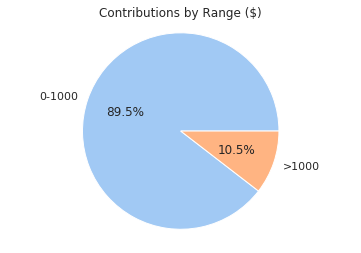

In [0]:
# thanks to: https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

sizes = [df2.loc[df2['Range']=='0-1000'].shape[0],df2.loc[df2['Range']=='> 1000'].shape[0]]
labels = ['0-1000','>1000']
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct="%1.1f%%")
ax1.axis('equal')
plt.title('Contributions by Range ($)')
plt.show()


### House Candidates by # of Contributions (All Time) (Plots)


      Candidate Name  Count
0       Luke, Sylvia   1181
1    Yamashita, Kyle    992
2      Souki, Joseph    854
3       Yamane, Ryan    819
4        Say, Calvin    775
5       Mizuno, John    774
6         Ward, Gene    741
7         Couch, Don    727
8    Johanson, Aaron    679
9     Tsuji, Clifton    675
10  Nishimoto, Scott    650
11      Saiki, Scott    648
12    Takai, K. Mark    645
13       Har, Sharon    638
14       Choy, Isaac    625
15  Magaoay, Michael    618
16     Aquino, Henry    592
17  Lee, Christopher    565
18   Nakashima, Mark    563
19        Cullen, Ty    535
20    Tokioka, James    533
21    Oshiro, Marcus    528
22    Belatti, Della    483
23   Ichiyama, Linda    482
24   McKelvey, Angus    463
25   Onishi, Richard    444
26       Takumi, Roy    428
27     DeCoite, Lynn    400
28      Hashem, Mark    387
29  Nakamura, Nadine    384


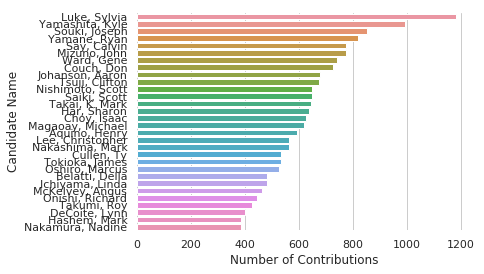

In [0]:
#Candidates by Contributions Received, House

num_of_candidates_house = 30

# Initialize the matplotlib figurec
#g = sns.FacetGrid(tips, col="time",  row="smoker")
#>>> g = g.map(plt.hist, "Count", bins=bins, color="r")

#candi_house = all_state_house_contribs['Candidate Name'].value_counts().order().index

# Plot horizontal bar plot
#candi_house = sns.FacetGrid(all_state_house_contribs, col="Election Period", y_order = all_state_house_contribs['Candidate Name'].value_counts().iloc[:30].index)
#candi_house = candi_house.map(plt.count, "Count",)

sns.countplot(y="Candidate Name", data=all_state_house_contribs, order = all_state_house_contribs['Candidate Name'].value_counts().iloc[:num_of_candidates_house].index)
plt.xlabel("Number of Contributions")

# Add a legend and informative axis label
#candi.legend(ncol=2, loc="lower right", frameon=True)
#candi.set(xlim=(0, 12), ylabel="", xlabel="Candidates by Contributions Received")
sns.despine(left=True, bottom=True)

#sanity check
print(all_state_house_contribs.groupby('Candidate Name').size().nlargest(num_of_candidates_house).reset_index(name='Count'))

### House Candidates by # of Contributions per Election Period (Plots)

Note: `sns.catplot()` will error out IF seaborn version is not >= 0.9.0. We set it to 0.9.0 on install in the 'Importing Libraries' cell, but Colab has an older version saved. If the notebook defaults to an older version it can be fixed by resetting the runtime and re-running the install.

    Candidate Name  Count
0     Luke, Sylvia   1181
1  Yamashita, Kyle    992
2    Souki, Joseph    854
3     Yamane, Ryan    819
4      Say, Calvin    775
5     Mizuno, John    774
6       Ward, Gene    741
7       Couch, Don    727
8  Johanson, Aaron    679
9   Tsuji, Clifton    675
  Election Period  Count
0       2016-2018   6586
1       2012-2014   6585
2       2014-2016   6551
3       2010-2012   5316
4       2008-2010   5294
5       2006-2008   4431
Candidate Name    Election Period
Luke, Sylvia      2016-2018          374
                  2014-2016          349
Say, Calvin       2010-2012          310
Magaoay, Michael  2006-2008          304
                  2008-2010          269
Saiki, Scott      2016-2018          260
Yamashita, Kyle   2016-2018          244
Luke, Sylvia      2012-2014          234
Souki, Joseph     2014-2016          234
Takai, K. Mark    2006-2008          231
Tegarden, Deidre  2014-2016          223
Lee, Christopher  2012-2014          219
Takai, K. Mar

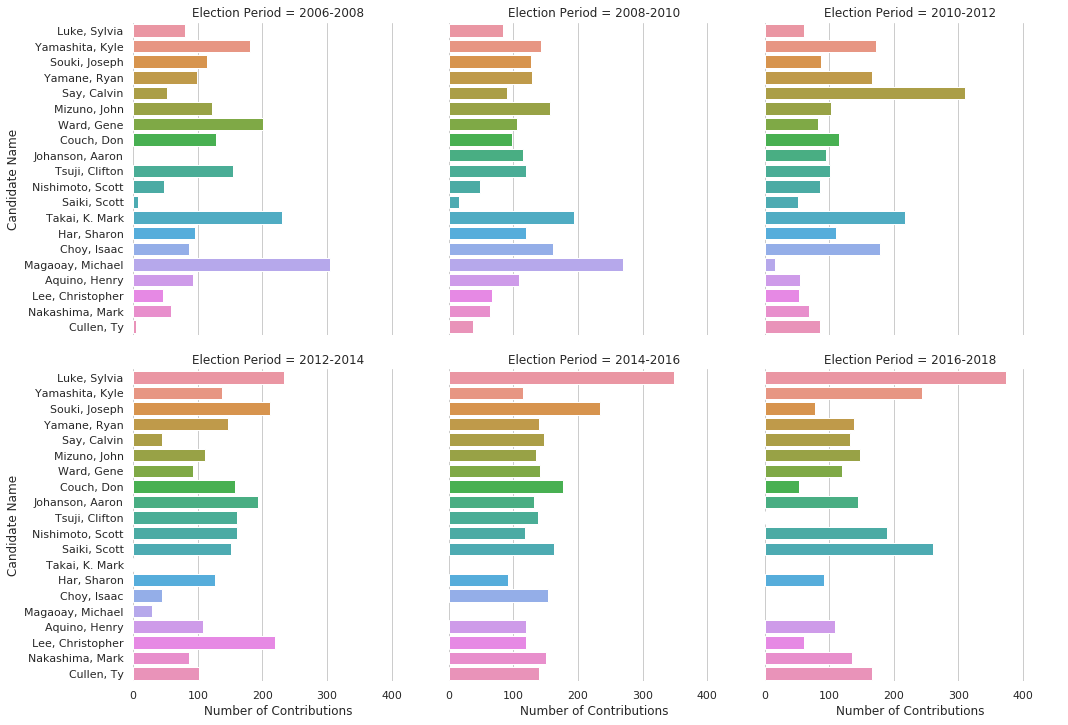

In [0]:
#Candidates by Number of Individual Contributions Received, House col by Election Period

# select # of candidates to show
num_candis = 20
# Plot horizontal bar plot
candi_house = sns.catplot(y="Candidate Name", col="Election Period", 
                          data=all_state_house_contribs, col_wrap=3, kind="count", 
                          order=all_state_house_contribs['Candidate Name'].value_counts().iloc[:num_candis].index, 
                          col_order = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
candi_house.set_axis_labels("Number of Contributions")
candi_house.set(xlim=(0,450)) #450 to force a tick line on '400'

#sanity check
print(all_state_house_contribs.groupby('Candidate Name').size().nlargest(10).reset_index(name='Count'))
print(all_state_house_contribs.groupby('Election Period')['Candidate Name'].size().nlargest(10).reset_index(name='Count'))
print(all_state_house_contribs.groupby(['Candidate Name','Election Period'])['Amount'].count().sort_values(ascending=False).head(num_candis))

print('\n---\n')

### House Candidates by Amount Received per Election Period (Plots)

  Election Period       Count
0       2016-2018  2808856.52
1       2012-2014  2718575.73
2       2014-2016  2674591.44
3       2008-2010  2151482.11
4       2010-2012  2132730.02
5       2006-2008  1828001.71


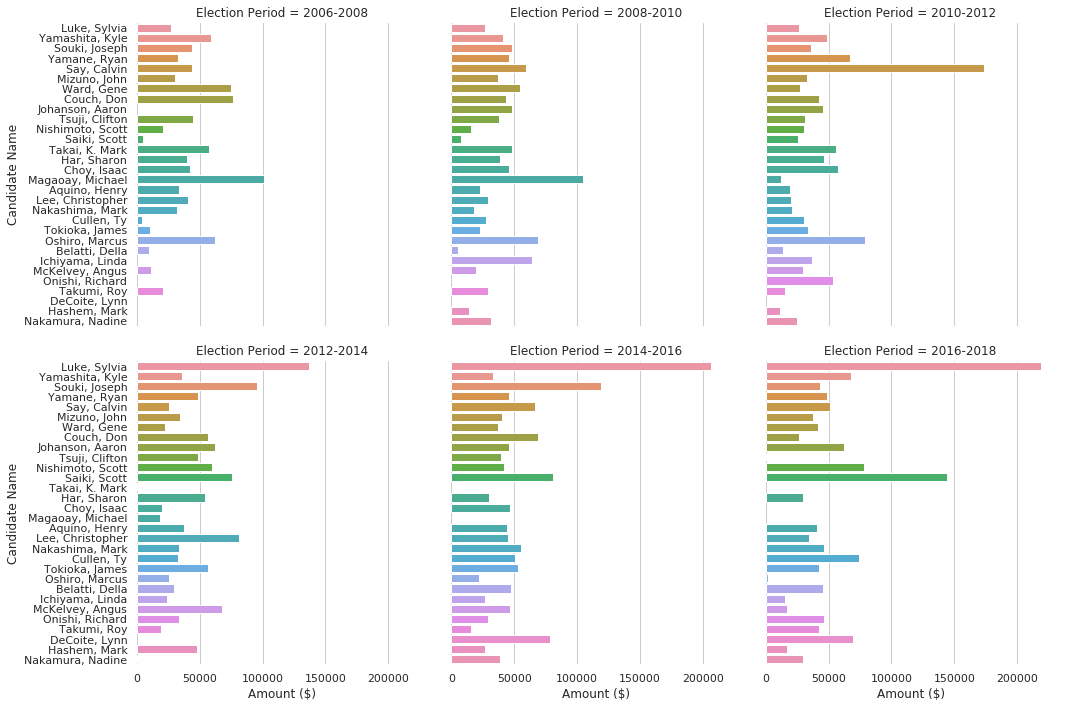

In [0]:
#Candidates by Amount Received, House col by Election Period

# Plot horizontal bar plot
num_candis = 30
candi_house = sns.catplot(x="Amount", y="Candidate Name", col="Election Period", data=all_state_house_contribs, kind ="bar", estimator=sum, ci=None, col_wrap=3, order=all_state_house_contribs['Candidate Name'].value_counts().iloc[:num_candis].index, col_order = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
candi_house.set_axis_labels("Amount ($)") # add $ sign to Amount label

#sanity check
print(all_state_house_contribs.groupby('Election Period')['Amount'].sum().nlargest(10).reset_index(name='Count'))

### Senate Candidates by # of Contributions (All Time) (Plots)

           Candidate Name  Count
0      Dela Cruz, Donovan   1670
1        Kidani, Michelle   1475
2          Baker, Rosalyn   1359
3            Hee, Clayton   1337
4             Green, Josh   1238
5        Inouye, Lorraine   1210
6             Kouchi, Ron   1190
7        Taniguchi, Brian   1023
8   Keith-Agaran, Gilbert   1008
9              Kim, Donna    924
10       Takamine, Dwight    917
11        English, Kalani    855
12         Chang, Stanley    817
13           Rhoads, Karl    815
14           Wakai, Glenn    789
15               Ito, Ken    715
16    Nishihara, Clarence    672
17   Galuteria, Brickwood    660
18        Kahele, Kaialii    576
19        Kahele, Gilbert    542
20           Riviere, Gil    531
21   Keohokalole, Jarrett    479
22      Hanabusa, Colleen    477
23     Shimabukuro, Maile    463
24         Herkes, Robert    341
25          Gabbard, Mike    320
26        Solomon, Malama    295
27             Ihara, Les    284
28              Hong, Ted    279
29      Lo

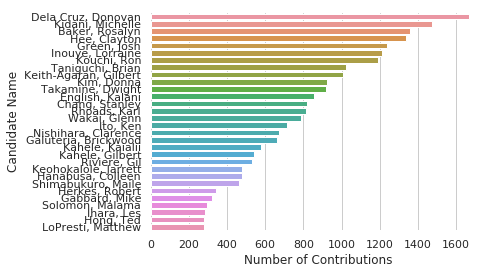

In [0]:
#Candidates by Contributions Received, House

num_sen_candis = 30
sen_count_plot = sns.countplot(y="Candidate Name", data=all_state_senate_contribs, order=all_state_senate_contribs['Candidate Name'].value_counts().iloc[:num_sen_candis].index)

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
plt.xlabel("Number of Contributions")

#sanity check
print(all_state_senate_contribs.groupby('Candidate Name').size().nlargest(num_sen_candis).reset_index(name='Count'))

### Senate Candidates by # of Contributions per Election Period (Plots)

          Candidate Name  Count
0     Dela Cruz, Donovan   1670
1       Kidani, Michelle   1475
2         Baker, Rosalyn   1359
3           Hee, Clayton   1337
4            Green, Josh   1238
5       Inouye, Lorraine   1210
6            Kouchi, Ron   1190
7       Taniguchi, Brian   1023
8  Keith-Agaran, Gilbert   1008
9             Kim, Donna    924
  Election Period  Count
0       2014-2016   4850
1       2010-2012   4805
2       2016-2018   4674
3       2006-2008   4613
4       2012-2014   4555
5       2008-2010   3930


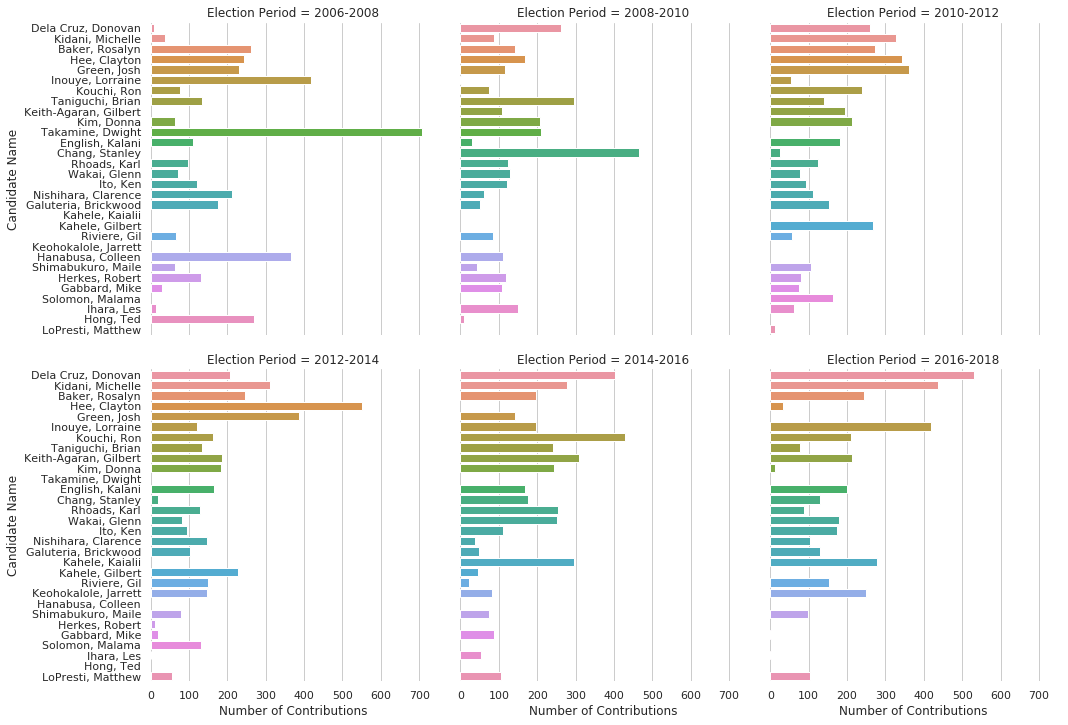

In [0]:
#Candidates by Contributions Received, Senate col by Election Period

# Plot horizontal bar plot
candi_senate = sns.catplot(y="Candidate Name", col="Election Period",
                           data=all_state_senate_contribs, kind ="count", col_wrap=3,
                           order = all_state_senate_contribs['Candidate Name'].value_counts().iloc[:30].index, 
                           col_order = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
candi_senate.set_axis_labels("Number of Contributions")

#sanity check
print(all_state_senate_contribs.groupby('Candidate Name').size().nlargest(10).reset_index(name='Count'))
print(all_state_senate_contribs.groupby('Election Period')['Candidate Name'].size().nlargest(10).reset_index(name='Count'))


### Senate Candidates by Amount Received per Election Period (Plots)

  Election Period       Count
0       2010-2012  2328781.88
1       2012-2014  2213157.89
2       2006-2008  2174026.18
3       2016-2018  2106065.47
4       2014-2016  2046221.55
5       2008-2010  1724203.29

---

Election Period  Candidate Name    
2012-2014        Hee, Clayton          354067.62
2016-2018        Dela Cruz, Donovan    275360.42
2008-2010        Chang, Stanley        254938.67
2006-2008        Hee, Clayton          245075.02
2012-2014        Green, Josh           230532.52
2010-2012        Hee, Clayton          215315.28
2006-2008        Takamine, Dwight      214981.91
2014-2016        Kouchi, Ron           211201.77
2010-2012        Green, Josh           205825.00
2006-2008        Green, Josh           182000.00
Name: Amount, dtype: float64

---



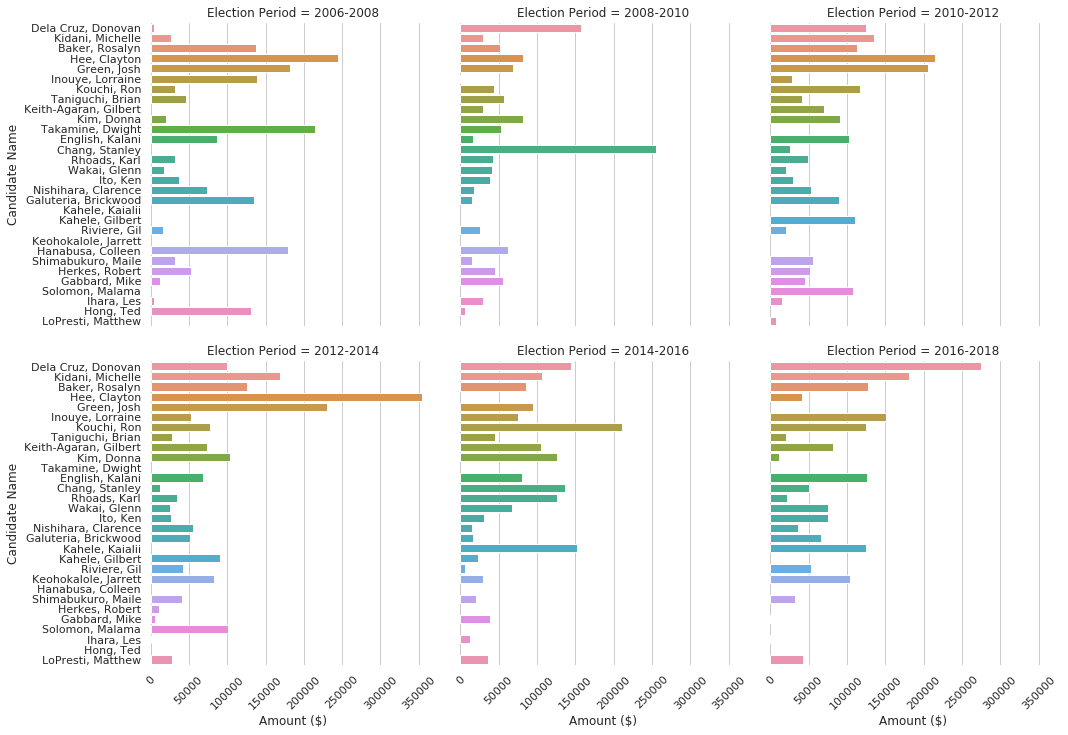

In [0]:
#Candidates by Amount Received, Senate col by Election Period

# Plot horizontal bar plot
candi_senate = sns.catplot(x ="Amount", y="Candidate Name", col="Election Period", 
                           data=all_state_senate_contribs, kind ="bar", estimator=sum,
                           col_wrap=3, ci=None,
                           order = all_state_senate_contribs['Candidate Name'].value_counts().iloc[:30].index, 
                           col_order = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])


# Add a legend and informative axis label
candi_senate.set_axis_labels("Amount ($)")
candi_senate.set_xticklabels(rotation=45) # rotate xtick labels
candi_senate.despine(left=True, bottom=True) # remove labels from sides

#sanity check
print(all_state_senate_contribs.groupby('Election Period')['Amount'].sum().nlargest(10).reset_index(name='Count'))
print("\n---\n")
print(all_state_senate_contribs.groupby(['Election Period','Candidate Name'])['Amount'].sum().sort_values(ascending=False).head(10))
print("\n---\n")

Of our top 10 candidates ranked by receiving most individual contributions in the house and senate, some amount were elected to office. 

### Total Amount by Recipient Party

Party
Democrat        54341579.04
Non-Partisan    21808292.35
Republican       9080850.57
Independent      5455837.99
Libertarian        52563.50
Green              42491.00
Name: Amount, dtype: float64


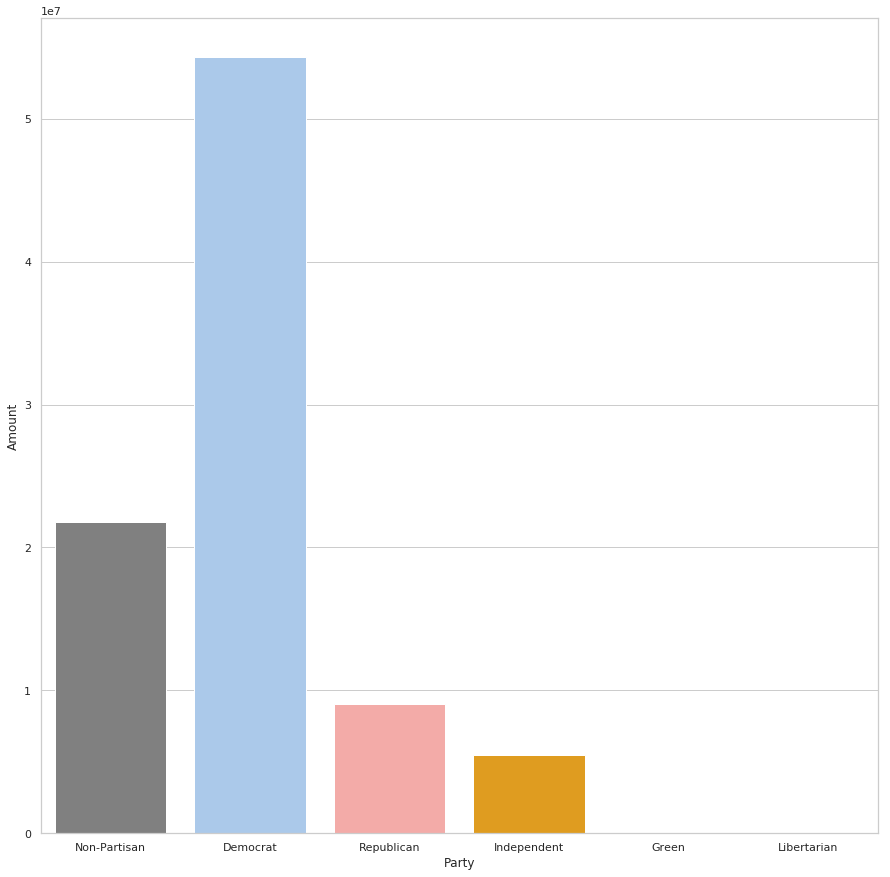

In [0]:
#palette should be reviewed/tweaked for aesthetics & for accessibility ie. color-blindness:
my_pal= {"Non-Partisan": "grey", "Democrat": "b", "Republican":"r", "Independent":"orange", "Green":"g", "Libertarian":"orchid"}
plt.figure(figsize=(15, 15))

#creating boxplot for Amount donated by Recipient Party
# sns.boxplot(x="Party", y="Amount", data=df2.sum(), palette=my_pal,)

party_amount = df2[['Amount','Party']].copy(deep=True) # make a copy to speed up processing of the graphs below. not really necessary

#bar plot based on summation (takes a few more seconds to process)
sns.barplot(x="Party",y="Amount",data=party_amount, palette=my_pal, estimator=sum, ci=None)

#sanity check:
print(df2.groupby(['Party'])['Amount'].sum().sort_values(ascending=False))



### Amount by Recipient Party per Election Period

total: 154102
dems+non-dems 154102

---

154102


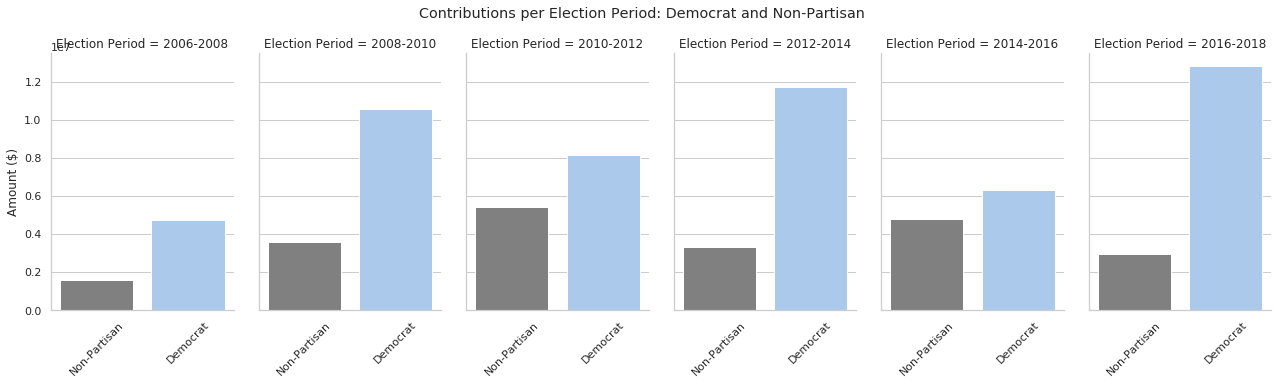

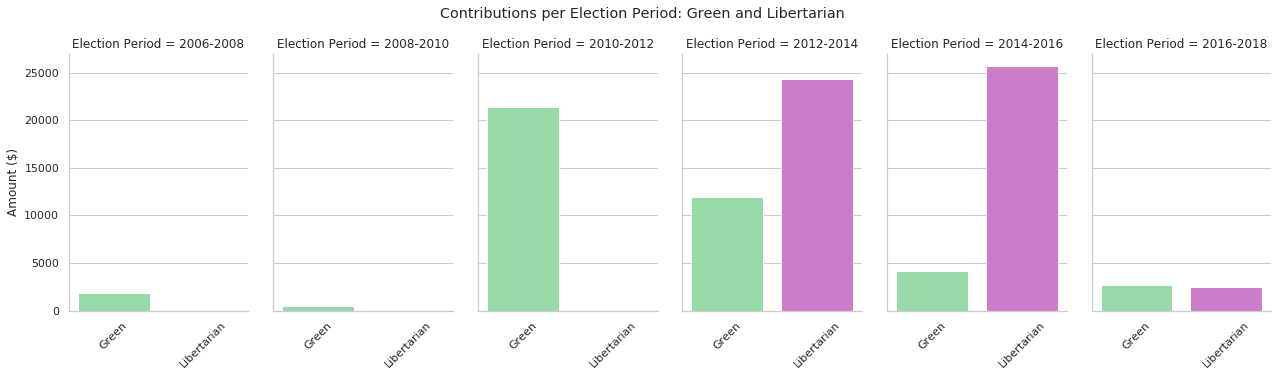

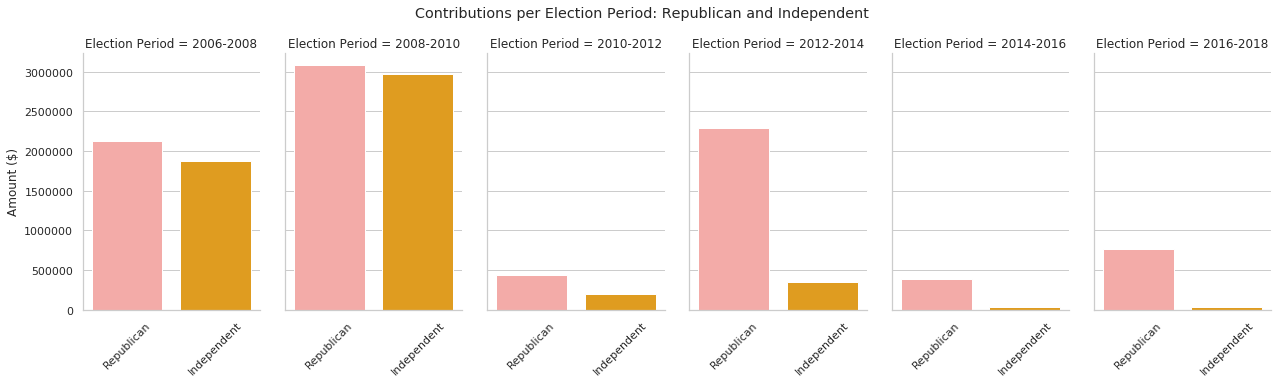

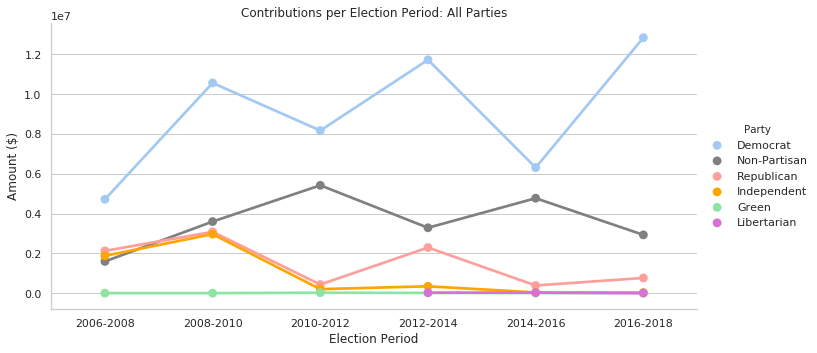

Libertarian
Election Period
2012-2014    24360.04
2014-2016    25703.46
2016-2018     2500.00
Name: Amount, dtype: float64
Non-Partisan
Election Period
2006-2008        1594641.88
2008-2010        3597561.27
2009-2012(D3)     207820.52
2010-2012        5420309.30
2012-2014        3286450.12
2014-2016        4771890.82
2016-2018        2929618.44
Name: Amount, dtype: float64
Republican
Election Period
2006-2008    2123391.96
2008-2010    3082797.98
2010-2012     433064.01
2012-2014    2293484.32
2014-2016     384546.48
2016-2018     763565.82
Name: Amount, dtype: float64


In [0]:
# Amount by Recipient Party per Election Period
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

# Set up
# ------
party_palette = {"Non-Partisan": "grey", "Democrat": "b", "Republican":"r",
                 "Independent":"orange", "Green":"g", "Libertarian":"orchid"}

# creating subsets to speed up processing & to split up graphs
#  (some values are way larger than others)
# -----------------------------------------

#all parties:
party_only = df2[['Amount','Party','Election Period']].copy()

# dems vs non-dems:
dems = df2.loc[df2['Party']=='Democrat'][['Amount','Party','Election Period']].copy()
non_dems = df2.loc[df2['Party']!='Democrat'][['Amount','Party','Election Period']].copy()

## sanity check
print("total:",df2.shape[0])
print("dems+non-dems",dems.shape[0]+non_dems.shape[0])
print("\n---\n")

# parties that aren't dems or nonpartisans
non_dems_np = df2.loc[(df2['Party']!='Democrat')&(df2['Party']!='Non-Partisan')][['Amount','Party','Election Period']].copy()

# 3-way split by relative amounts so as not to get lost on graph
dems_np = df2.loc[(df2['Party']=='Democrat')|(df2['Party']=='Non-Partisan')][['Amount','Party','Election Period']].copy()
greens_libs = df2.loc[(df2['Party']=='Green')|(df2['Party']=='Libertarian')][['Amount','Party','Election Period']].copy()
reps_inds = df2.loc[(df2['Party']=='Independent')|(df2['Party']=='Republican')][['Amount','Party','Election Period']].copy()
print(non_dems_np.shape[0]+dems_np.shape[0])

split_3 = {
    "Democrat and Non-Partisan": dems_np,
    "Green and Libertarian": greens_libs,
    "Republican and Independent": reps_inds
}

# BAR GRAPHS
# This loop will generate 3 BAR graphs based on the data in split_3
for x in split_3.keys():
  # BAR chart of Party amounts where each sub-graph is an election period
  party_by_period = sns.catplot(x='Party',
                                y='Amount',
                                col='Election Period',
                                palette=party_palette,
                                col_wrap=6,
                                data=split_3[x],
                                kind='bar',
                                estimator=sum,
                                ci=None,
                                aspect=0.6,
                               col_order = ['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])

  party_by_period.set_axis_labels('',"Amount ($)") # fancify y-axis
  party_by_period.set_xticklabels(rotation=45) # rotate xtick labels
  plt.subplots_adjust(top=.85) # push subplots down to make room for title
  party_by_period.fig.suptitle(f'Contributions per Election Period: {x}') # add title
  plt.show()

# ------------------------------------------------------------------------------

# LINE graphs

all_parties_line_plot = sns.catplot(x='Election Period',
                                y='Amount',
                                hue='Party',
                                hue_order=['Democrat','Non-Partisan','Republican','Independent','Green','Libertarian'],
                                kind='point',
                                data=party_only,
                                palette=party_palette,
                                ci=None,
                                aspect=2,
                                estimator=sum,
                                order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])
# all_parties_line_plot.set_xticklabels(rotation=45)
all_parties_line_plot.set_axis_labels('Election Period',"Amount ($)")
plt.title('Contributions per Election Period: All Parties')
plt.show()

# more sanity check 
print("Libertarian")
print(df2.loc[df2['Party']=="Libertarian"].groupby(['Election Period'])['Amount'].sum())
print("Non-Partisan")
print(df2.loc[df2['Party']=="Non-Partisan"].groupby(['Election Period'])['Amount'].sum())
print("Republican")
print(df2.loc[df2['Party']=="Republican"].groupby(['Election Period'])['Amount'].sum())


### Chronological Trends by Date

What have been the trends of campaign contributions in different zip codes/voting districts over time?

#### Senate Contribution Amounts by Date

In [0]:
# test snippets to troubleshoot below

print(df2.loc[df2['Office']=='Senate']['Amount'].sum())
print(all_state_senate_contribs.Amount.sum())

suspect_district = '2'
print(f'Number of contributions to district {suspect_district}'.upper())
print(df2.loc[(df2['Office']=='Senate')&(df2['District']==suspect_district)].groupby('Election Period')['Amount'].count())
print(f'Amount of contributions to district {suspect_district}'.upper())
print(df2.loc[(df2['Office']=='Senate')&(df2['District']==suspect_district)].groupby('Election Period')['Amount'].sum())
# df2.loc[(df2['Office']=='Senate')&(df2['District']==suspect_district)]

12593056.309999999
12592456.26
NUMBER OF CONTRIBUTIONS TO DISTRICT 2
Election Period
2006-2008    136
2008-2010    190
2010-2012    125
2012-2014    116
2014-2016    133
2016-2018      7
Name: Amount, dtype: int64
AMOUNT OF CONTRIBUTIONS TO DISTRICT 2
Election Period
2006-2008    58150.00
2008-2010    88104.84
2010-2012    70782.90
2012-2014    51303.33
2014-2016    69457.52
2016-2018     1700.00
Name: Amount, dtype: float64


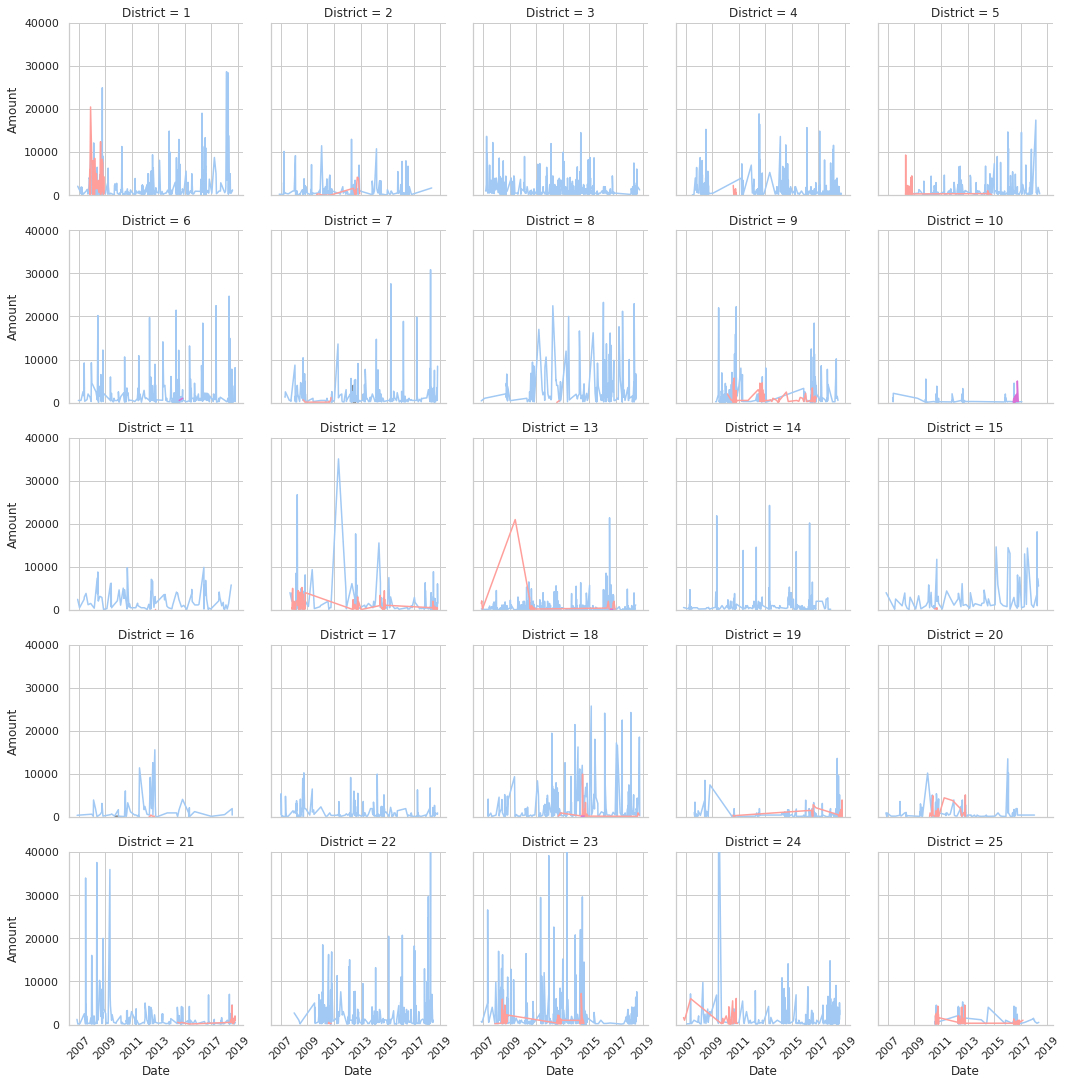

In [0]:
# one alternate path is taking only a subset by election period

districts = sns.FacetGrid(all_state_senate_contribs,
                         col="District",
                         col_order=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"],
                         col_wrap=5,
                         hue="Party",
                         palette=my_pal,
                         ylim=(0,40000))
districts.map(sns.lineplot, "Date", "Amount", estimator=sum,ci=None)
districts.set_xticklabels(rotation=45)

#### House Contribution Amounts by Date

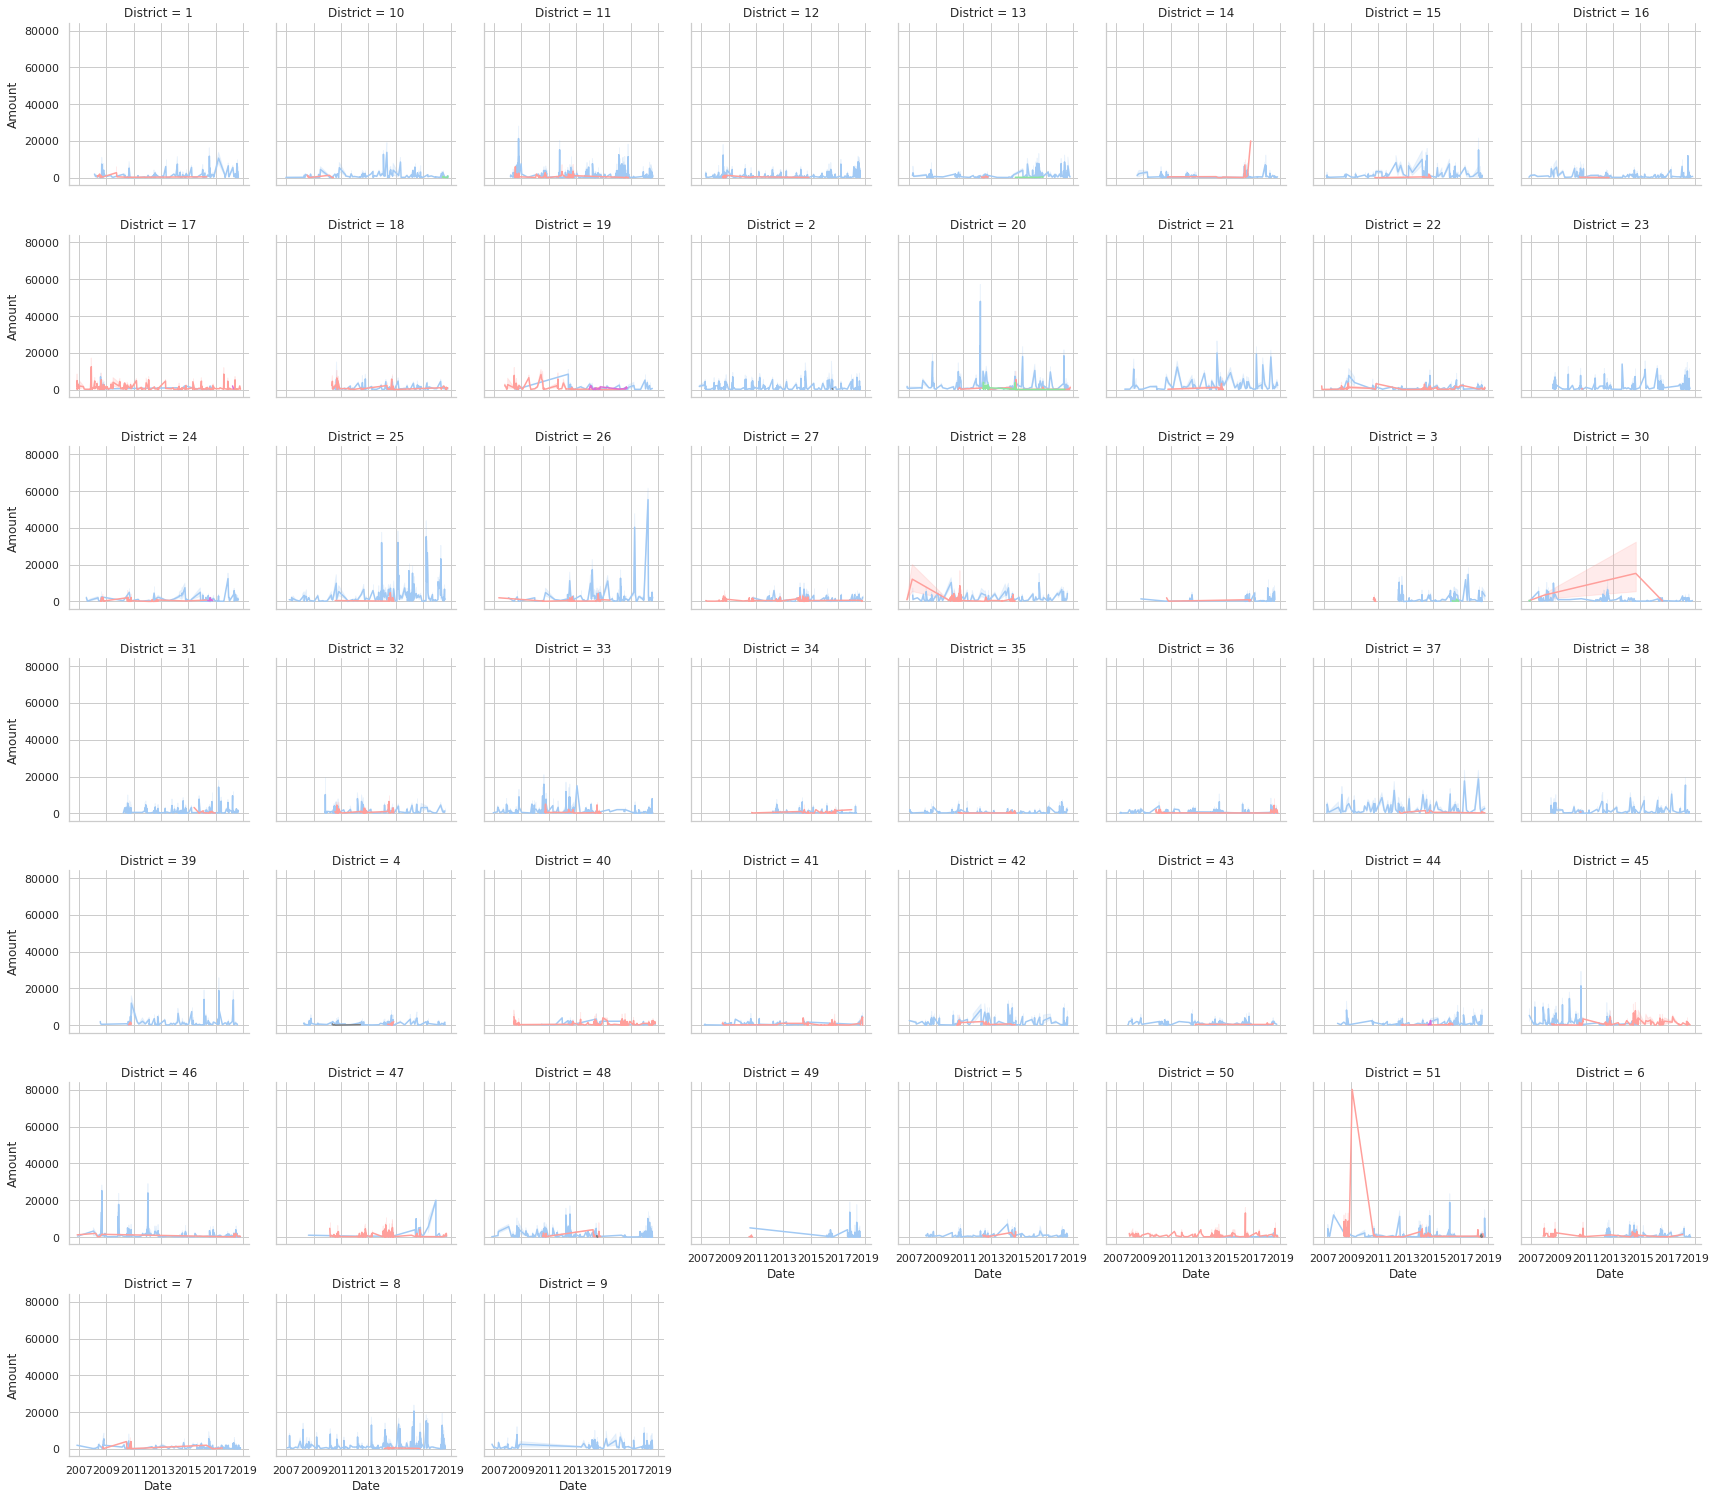

In [0]:
districts = sns.FacetGrid(all_state_house_contribs, col="District", hue="Party", palette=my_pal, col_wrap=8,)
districts.map(sns.lineplot, "Date", "Amount", estimator=sum)

#### Contributions by Date per Party

In [0]:
#creating data subsets by election periods '2006-2008', '2008-2010' '2009-2012 '2010-2012' '2012-2014' '2014-2016' '2016-2018' 
#2006-2008
df_0608 = df2.dropna(subset=['Election Period'])
df_0608 = df2[df2["Election Period"].str.contains("2006-2008")]

#2008-2010
df_0810 = df2.dropna(subset=['Election Period'])
df_0810 = df2[df2["Election Period"].str.contains("2008-2010")]

#2009-2012
df_0912 = df2.dropna(subset=['Election Period'])
df_0912 = df2[df2["Election Period"].str.contains("2009-2012")]

#2010-2012
df_1012 = df2.dropna(subset=['Election Period'])
df_1012 = df2[df2["Election Period"].str.contains("2010-2012")]

#2012-2014
df_1214 = df2.dropna(subset=['Election Period'])
df_1214 = df2[df2["Election Period"].str.contains("2012-2014")]

#2014-2016
df_1416 = df2.dropna(subset=['Election Period'])
df_1416 = df2[df2["Election Period"].str.contains("2014-2016")]

#2016-2018
df_1618 = df2.dropna(subset=['Election Period'])
df_1618 = df2[df2["Election Period"].str.contains("2016-2018")]


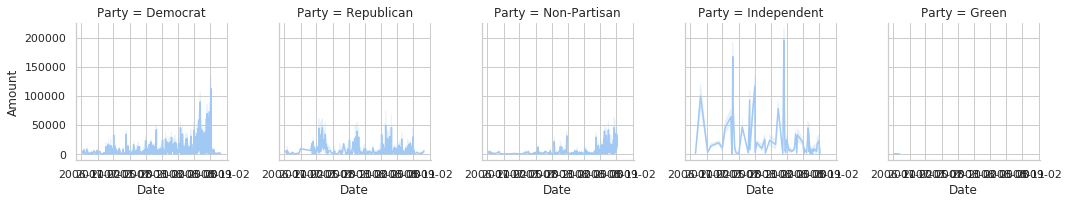

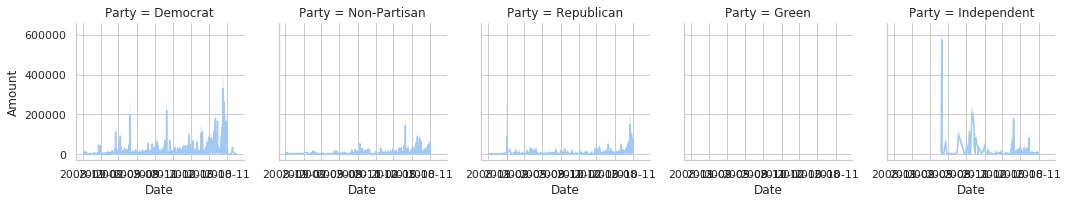

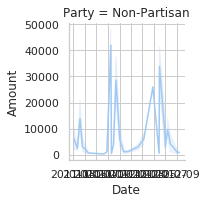

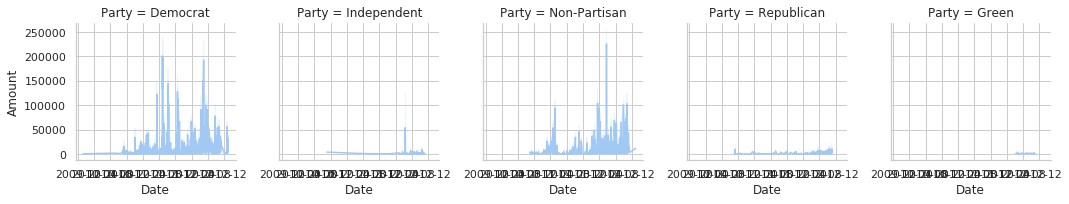

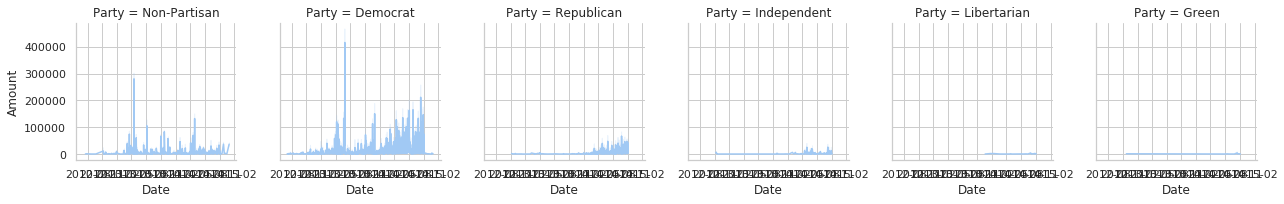

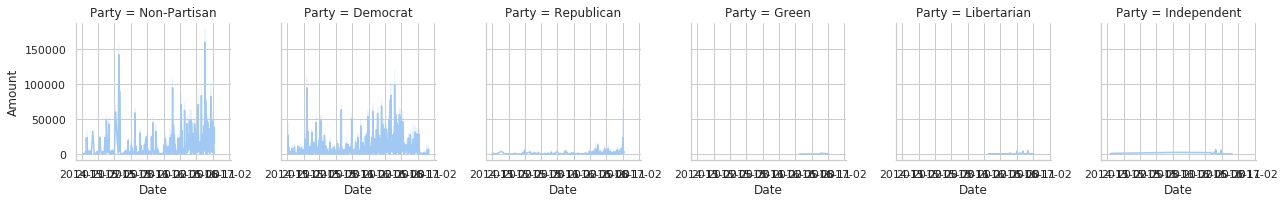

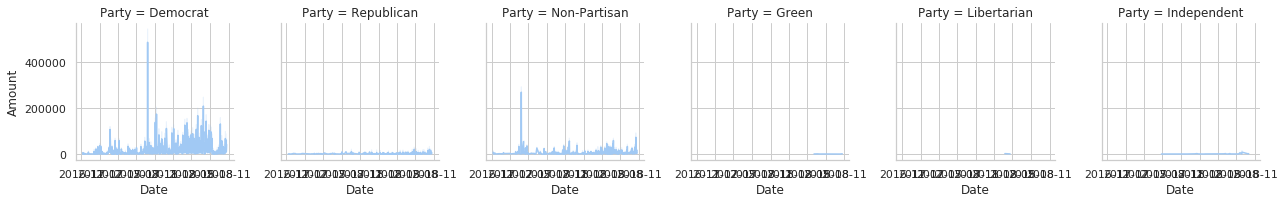

In [0]:
#making plot with non-date-indexed data, need to clean up date axis

plt.figure(figsize=(45, 45))

e_0608 = sns.FacetGrid(df_0608, col="Party")
e_0608.map(sns.lineplot, "Date", "Amount", estimator=sum)

e_0810 = sns.FacetGrid(df_0810, col="Party")
e_0810.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
e_0912 = sns.FacetGrid(df_0912, col="Party")
e_0912.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
e_1012 = sns.FacetGrid(df_1012, col="Party")
e_1012.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
e_1214 = sns.FacetGrid(df_1214, col="Party")
e_1214.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
e_1416 = sns.FacetGrid(df_1416, col="Party")
e_1416.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
e_1618 = sns.FacetGrid(df_1618, col="Party")
e_1618.map(sns.lineplot, "Date", "Amount", estimator=sum)
           
#df_0810.resample('1M').count()['Amount']
#Could style by Office race, just need to clean up office entries by replacing space w/dashes; had error message for entries like "Hawaii Council" etc.
#sns.lineplot(x="Date", y="Amount", hue="Party", style="Office", data= df_0810)




#### Contributions by Date per Election Period

  Election Period          Sum
0       2008-2010  20215781.41
1       2012-2014  17693179.41
2       2016-2018  16581975.61
3       2010-2012  14250950.32
4       2014-2016  11535589.86
5       2006-2008  10316603.80
6   2009-2012(D3)    207820.52


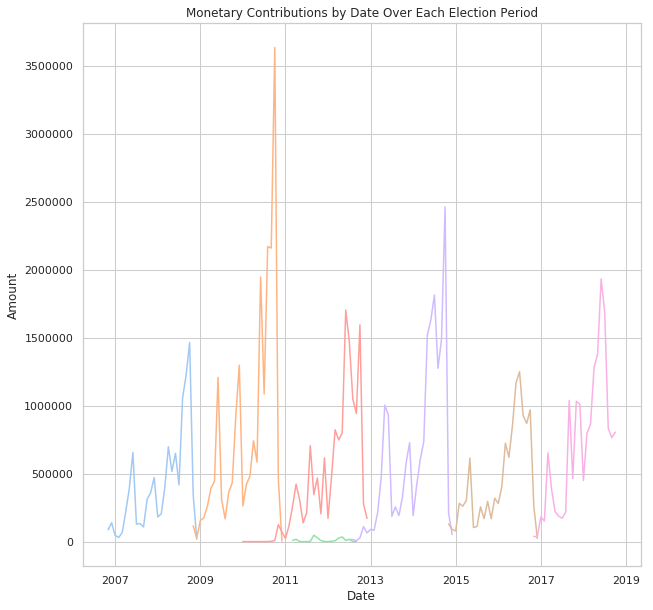

In [0]:
#making contribution for election period plot with date-indexed data
#2006-2008
df3_0608 = df3.dropna(subset=['Election Period'])
df3_0608 = df3[df3["Election Period"].str.contains("2006-2008")]

#2008-2010
df3_0810 = df3.dropna(subset=['Election Period'])
df3_0810 = df3[df3["Election Period"].str.contains("2008-2010")]

#2009-2012
df3_0912 = df3.dropna(subset=['Election Period'])
df3_0912 = df3[df3["Election Period"].str.contains("2009-2012")]

#2010-2012
df3_1012 = df3.dropna(subset=['Election Period'])
df3_1012 = df3[df3["Election Period"].str.contains("2010-2012")]

#2012-2014
df3_1214 = df3.dropna(subset=['Election Period'])
df3_1214 = df3[df3["Election Period"].str.contains("2012-2014")]

#2014-2016
df3_1416 = df3.dropna(subset=['Election Period'])
df3_1416 = df3[df3["Election Period"].str.contains("2014-2016")]

#2016-2018
df3_1618 = df3.dropna(subset=['Election Period'])
df3_1618 = df3[df3["Election Period"].str.contains("2016-2018")]


plt.figure(figsize=(10, 10))
plt.title('Monetary Contributions by Date Over Each Election Period')
plt.ylabel('Amount')

df3_0608.resample('1M').sum()['Amount'].plot()
df3_0810.resample('1M').sum()['Amount'].plot()
df3_0912.resample('1M').sum()['Amount'].plot()
df3_1012.resample('1M').sum()['Amount'].plot()
df3_1214.resample('1M').sum()['Amount'].plot()
df3_1416.resample('1M').sum()['Amount'].plot()
df3_1618.resample('1M').sum()['Amount'].plot()



print(df3.groupby('Election Period')['Amount'].sum().nlargest(10).reset_index(name='Sum'))

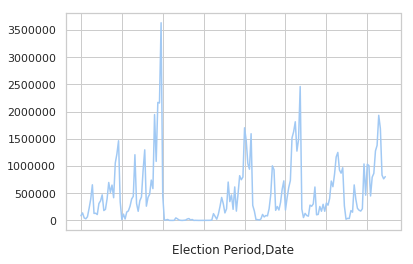

In [0]:
# alternative way to visualize the above (continuous plot)
# beware, there is one which overlaps e.g. 2009-2012 (the gap in middle)
df3.groupby('Election Period').resample('1M').sum()['Amount'].plot()

### How Much Money by District?

Notes

* Senate districts seem to garner more money than House districts
  * House: over the 500K mark: 8, 11, 25 - what's special?
    - 8: Kahakuloa, Waihee, Waiehu, Puuohala, Wailuku, Waikapu (Maui)
    - 11: Kihei, Wailea, Makena (Maui)
    - 25: Makiki, Punchbowl, Nuuanu, Dowsett Highlands, Pacific Heights, Pauoa (Oahu)
  * Senate: over the 800K mark - 1, 22, 23 - what's special?
    - 1: Hilo (Hawaii Island)
    - 22: Mililani Mauka, Waipi‘o Acres, Wheeler, Wahiawa, Whitmore Village, portion of Poamoho (Oahu)
    - 23: Kane‘ohe , Ka‘a‘awa, Hau‘ula, La‘ie, Kahuku, Waialua, Hale‘iwa, Wahiawa, Schofield Barracks, Kunia (Oahu)
  * Oddities *might* be clarified by time period
* Senate districts 3, 10, and 16 seem inordinately low for a 12-year sum
  - 3: Kona, Ka‘u (Hawaii Island -- I think)
  - 10: Kaimuki, Kapahulu, Palolo, Maunalani Heights, St. Louis Heights, Mo‘ili‘ili, Ala Wai
  - 16: Pearl City, Momilani, Pearlridge, ‘Aiea, Royal Summit, ‘Aiea Heights, Newtown, Waimalu, Halawa, Pearl Harbor



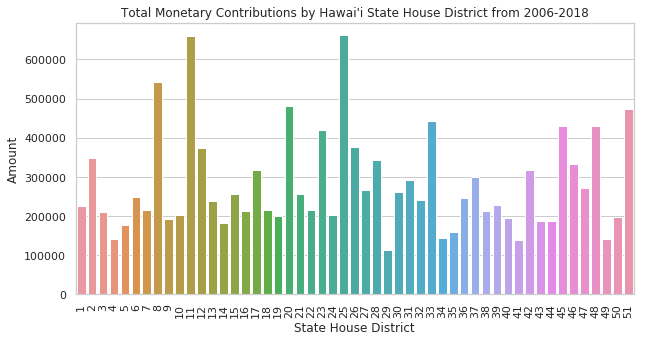

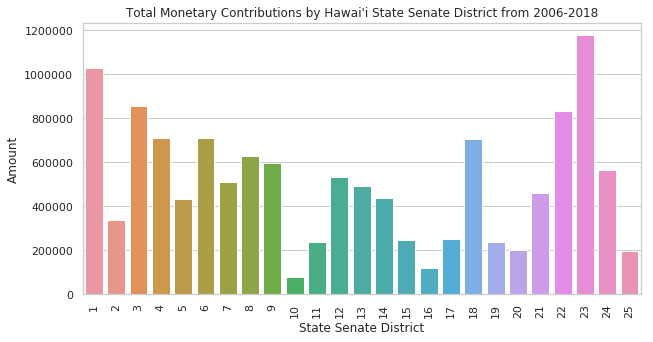

In [0]:
# CONTRIBUTIONS BY DISTRICT

# State House Districts

plt.figure(figsize=(10, 5))
sns.barplot(x="District", y="Amount", data=all_state_house_contribs, estimator=sum, ci=None, order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51'])
plt.title('Total Monetary Contributions by Hawai\'i State House District from 2006-2018')
plt.xlabel('State House District')
plt.xticks(rotation=90)
plt.show()

# sanity check
# print(all_state_house_contribs.groupby('District')['Amount'].sum())

# -----------------------------------------------------------------------------

plt.figure(figsize=(10, 5))
sns.barplot(x="District", y="Amount", data=all_state_senate_contribs, estimator=sum, ci=None, order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25'])
plt.title('Total Monetary Contributions by Hawai\'i State Senate District from 2006-2018')
plt.xlabel('State Senate District')
plt.xticks(rotation=90)
plt.show()

# sanity check
# print(all_state_senate_contribs.groupby('District')['Amount'].sum())


# -----------------------------------------------------------------------------



#### Summary Stats (Brief)

In [0]:
# stats based on the totals for each district (all time)

# House
h = all_state_house_contribs.groupby(['District'])['Amount'].sum()
print('House')
print(h.describe())

print('\n---\n')

# Senate 
print('Senate')
print(all_state_senate_contribs.groupby('District')['Amount'].sum().describe())

House
count        51.000000
mean     280671.324118
std      126101.914713
min      112855.330000
25%      199385.405000
50%      240095.880000
75%      337779.280000
max      661217.820000
Name: Amount, dtype: float64

---

Senate
count    2.500000e+01
mean     5.036983e+05
std      2.845576e+05
min      7.707978e+04
25%      2.486226e+05
50%      4.921788e+05
75%      7.064243e+05
max      1.176640e+06
Name: Amount, dtype: float64


### How Much Money by County? (Includes by Election Period)

Note -- rows with 'County' specified only make up about 30% of the data. Thus the figure illustrates only that 30% and may not be meaningful when broken down past 'County' level (e.g. into election period).

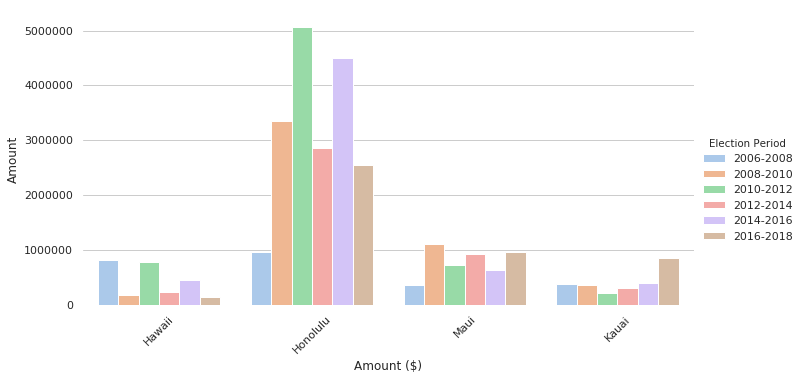

Election Period
2006-2008    818567.74
2008-2010    181557.89
2010-2012    774121.93
2012-2014    228014.40
2014-2016    445334.01
2016-2018    136377.84
Name: Amount, dtype: float64

In [0]:
# Contributions by County

# Plot horizontal bar plot
county_plot = sns.catplot(x='County',
                         y='Amount',
                         hue='Election Period',
                         data=df2,
                         kind='bar',
                         estimator=sum,
                         ci=None,
                          aspect=2,
                         hue_order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])

# Add a legend and informative axis label
county_plot.set_axis_labels("Amount ($)")
county_plot.set_xticklabels(rotation=45) # rotate xtick labels
county_plot.despine(left=True, bottom=True) # remove labels from sides
plt.show()

#sanity check
df2.loc[(df2['County']=='Hawaii')].groupby('Election Period')['Amount'].sum()

### In-State vs Out-of-State Contributions per Election Period

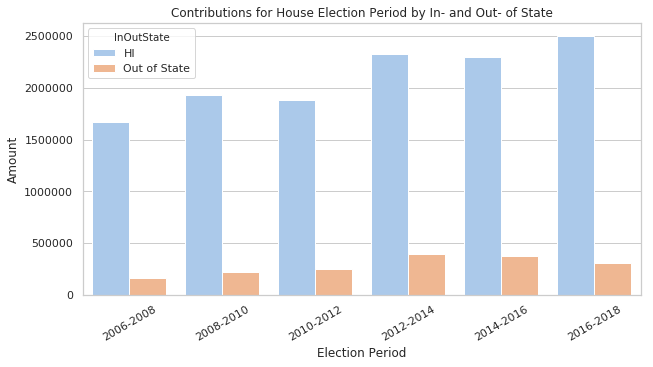

In [0]:
plt.figure(figsize=(10, 5))

sns.barplot(x="Election Period", y="Amount", hue="InOutState", data=all_state_house_contribs, estimator=sum, ci=None, order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])
plt.title('Contributions for House Election Period by In- and Out- of State')
plt.xlabel('Election Period')
plt.xticks(rotation=30)
plt.show()

### Exploring "Outlying" Senate & House Districts

These are the districts that stood out either because they were exceptionally high or exceptionally low compared to the rest.

While the charts in this section provide a more detailed look at each district over the years, because the fluctuation in each district may be very candidate- and issue-specific (down to a local granularity), these may be analyses which need to be relegated to future work. In particular, a party-by-party breakdown of each district, along with party composition by voter numbers, could illustrate district-level trends a lot better.

### House Districts: High

Notes
- All 3 districts feature high-profile Democratic reps (Joe Souki, Kaniela Ing, and Sylvia Luke)
- Luke in particular is one of the top recipients in terms of contributions

District 8: Kahakuloa, Waihee, Waiehu, Puuohala, Wailuku, Waikapu (Maui)
District 11: Kihei, Wailea, Makena (Maui)
District 25: Makiki, Punchbowl, Nuuanu, Dowsett Highlands, Pacific Heights, Pauoa (Oahu)


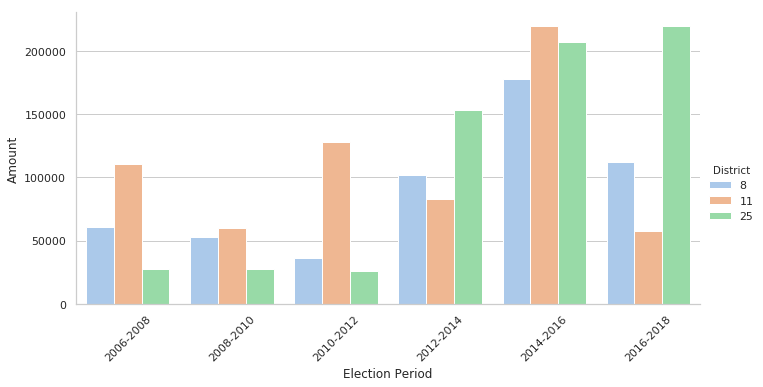


---

CANDIDATES PER ELECTION CYCLE
District 8
Election Period  Party       Candidate Name    
2006-2008        Democrat    Kama, Natalie          16254.00
                             Souki, Joseph          44225.00
2008-2010        Democrat    Hughey, Justin          1300.00
                             Kama, Natalie           3305.00
                             Souki, Joseph          48670.65
2010-2012        Democrat    Kama, Natalie            175.00
                             Souki, Joseph          36050.00
2012-2014        Democrat    Souki, Joseph          95700.00
                 Republican  Kapoi, Cranston         5835.11
2014-2016        Democrat    Kane, Dain             58006.49
                             Souki, Joseph         118878.00
                 Republican  Kapoi, Cranston          500.00
                             Rebolledo, Gilbert       430.00
2016-2018        Democrat    Hashimoto, Troy        34270.00
                             Hughey, Justin        

In [0]:
# High House Districts
# subset: all_state_house_contribs

# Districts 8, 11, 25 (identified earlier)

h_all = df2.loc[(df2['Office']=='House')&((df2['District']=='8')|(df2['District']=='11')|(df2['District']=='25'))]

# Generate bar plots of money per election period

print("District 8: Kahakuloa, Waihee, Waiehu, Puuohala, Wailuku, Waikapu (Maui)")
print("District 11: Kihei, Wailea, Makena (Maui)")
print("District 25: Makiki, Punchbowl, Nuuanu, Dowsett Highlands, Pacific Heights, Pauoa (Oahu)")
  
hplot = sns.catplot(data=h_all,
                   x='Election Period',
                   y='Amount',
                   hue='District',
                   hue_order=['8','11','25'],
                   kind='bar',
                   ci=None,
                   estimator=sum,
                   aspect=2,
                   order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])
hplot.set_xticklabels(rotation=45)
plt.show()

print("\n---\n")

# ------------------------------------------------------------------------------

# look at candidates from these areas to get some insight

hh_d = ['8','11','25']

print('Candidates per Election Cycle'.upper())
for d in hh_d:
  print(f'District {d}')
  print(h_all.loc[h_all['District']==d].groupby(['Election Period','Party','Candidate Name'])['Amount']
        .sum())
  print("\n---\n")

# ------------------------------------------------------------------------------

# look at party breakdown

print("Party Breakdown".upper())
print(h_all.groupby('Party').count()['Candidate Name']) #hmm


### Senate Districts: High

Notes
- Surmising that the spike in D25 (Clayton Hee) is because of his heavy involvement in the same-sex marriage legalization which was happening 2012-2013. I notice the same trend for Chris Lee (House D51) who was heavily involved (in favor) and whose contributions also peaked around 2013.

1: Hilo (Hawaii Island)
22: Mililani Mauka, Waipi‘o Acres, Wheeler, Wahiawa, Whitmore Village, portion of Poamoho (Oahu)
23: Kane‘ohe , Ka‘a‘awa, Hau‘ula, La‘ie, Kahuku, Waialua, Hale‘iwa, Wahiawa, Schofield Barracks, Kunia (Oahu)


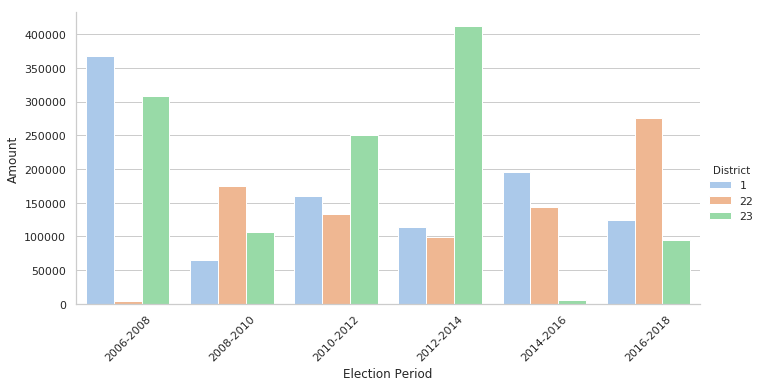


---

CANDIDATES PER ELECTION CYCLE
District 1
Election Period  Party        Candidate Name   
2006-2008        Democrat     Onishi, Dennis        22671.77
                              Takamine, Dwight     214981.91
                 Republican   Hong, Ted            130536.38
2008-2010        Democrat     Onishi, Dennis         7490.00
                              Takamine, Dwight      52652.30
                 Republican   Hong, Ted              5430.00
2010-2012        Democrat     Ikeda, Donald         29730.00
                              Kahele, Gilbert      109962.90
                              Onishi, Dennis        20791.00
2012-2014        Democrat     Kahele, Gilbert       90943.00
                              Onishi, Dennis        22318.00
                 Libertarian  Arianoff, Gregory       500.00
2014-2016        Democrat     Kahele, Gilbert       23144.22
                              Kahele, Kaialii      151559.00
                              Onishi, Dennis       

In [0]:
# High Senate Districts
# subset: all_state_senate_contribs

# Districts 1, 22, 23 (ID'd earlier)

sh_all = df2.loc[(df2['Office']=='Senate')&((df2['District']=='1')|(df2['District']=='22')|(df2['District']=='23'))]

# Generate bar plots of money per election period

print("1: Hilo (Hawaii Island)")
print("22: Mililani Mauka, Waipi‘o Acres, Wheeler, Wahiawa, Whitmore Village, portion of Poamoho (Oahu)")
print("23: Kane‘ohe , Ka‘a‘awa, Hau‘ula, La‘ie, Kahuku, Waialua, Hale‘iwa, Wahiawa, Schofield Barracks, Kunia (Oahu)")

hplot = sns.catplot(data=sh_all,
                   x='Election Period',
                   y='Amount',
                   hue='District',
                   hue_order=['1','22','23'],
                   kind='bar',
                   ci=None,
                   estimator=sum,
                   aspect=2,
                   order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])
hplot.set_xticklabels(rotation=45)
plt.show()

print("\n---\n")

# ------------------------------------------------------------------------------

# look at candidates from these areas to get some insight

sh_d = ['1','22','23']

print('Candidates per Election Cycle'.upper())
for d in sh_d:
  print(f'District {d}')
  print(sh_all.loc[sh_all['District']==d].groupby(['Election Period','Party','Candidate Name'])['Amount']
        .sum())
  print("\n---\n")

# ------------------------------------------------------------------------------

# look at party breakdown

print("Party Breakdown".upper())
print(sh_all.groupby('Party').count()['Candidate Name']) #hmm


### Senate Districts: Low

Potential explanations

- Mislabeled data
  - Josh Green was Senator in D-03 from 2008=2018. Before that he was in the House before then.... but in this data set all his contributions are labeled as Lt Gov (in years he didn't run for that office) or Hawaii Council (which he doesn't ever seem to have run for)
  - http://ags.hawaii.gov/campaign/files/2013/03/2008senate.pdf
  - https://ballotpedia.org/Joshua_Green
  - District 16 does not have David Ige listed, although he was a Senator for that district until 2014
- No actual election during that election period
  - District 10 during 2012-2014: had no 2014 election apparently
  - https://ballotpedia.org/Hawaii_State_Senate_District_10
- Redistricting effect - maybe (2012 was the first operative year after districts were redrawn after the 2010 census)

In [0]:
# troubleshooting low senate districts
# ------------------------------------

# District 3

print("District 3")

names = ['Kanuha, Dru','Ford, Brenda']
df2.loc[(df2['District']=='3')&(df2['Candidate Name'].isin(names))]['Amount'].sum()

# Josh Green 
print("Josh Green")
print(df2.loc[df2['Candidate Name'].str.contains('Green, Josh')].groupby(['Election Period','Office'])['Amount'].sum())
# Josh green was Senator in D-03 from 2008=2018. Before that he was in the House before then....
# http://ags.hawaii.gov/campaign/files/2013/03/2008senate.pdf

print('\n---\n')

#-------------------------------------------------------------------------------

# District 10

# According to Ballotpedia there doesn't seem to have been an election in 2014,
# which would explain the dip in contributions: https://ballotpedia.org/Hawaii_State_Senate_District_10

print("District 10")
df2.loc[(df2['Office']=='Senate')&(df2['District']=='10')].groupby(['Election Period','Candidate Name','Party','Office'])['Amount'].sum()

# df2.loc[(df2['Office']=='Senate')&(df2['District']=='10')].groupby(['Election Period'])['Amount'].sum()

print(df2.loc[(df2['Candidate Name'].str.contains('Ihara, Les'))].groupby(['Election Period']).sum())
         
# df2.loc[(df2['Candidate Name'].str.contains('Ihara, Les'))][['Candidate Name','Election Period','Date']].sort_values(by=['Date']).tail(100)

print('\n---\n')

#-------------------------------------------------------------------------------

# District 16
print("District 16")

df2.loc[(df2['Office']=='Senate')&(df2['District']=='16')].groupby(['Election Period','Candidate Name','Party','Office'])['Amount'].sum()

# df2.loc[(df2['District']=='16')].groupby(['Election Period','Candidate Name','Party','Office'])['Amount'].sum()

# David Ige
print(df2.loc[df2['Candidate Name'].str.contains('Ige, David')].groupby(['Election Period','Candidate Name','Office'])['Amount'].sum())

periods = ['2006-2008','2008-2010','2010-2012']
di_d16_sum = df2.loc[(df2['Candidate Name'].str.contains('Ige, David'))&(df2['Election Period'].isin(periods))]['Amount'].sum()
sen16sum = df2.loc[(df2['Office']=='Senate')&(df2['District']=='16')]['Amount'].sum()
print(sen16sum)
print("David Ige in D-16, 2006-2012:",di_d16_sum)



District 3
Josh Green
Election Period  Office      
2006-2008        Senate          182000.00
2008-2010        Senate           69150.00
2010-2012        Senate          205825.00
2012-2014        Senate          230532.52
2014-2016        Senate           94900.00
2016-2018        Lt. Governor    613110.67
Name: Amount, dtype: float64

---

District 10
                  Amount  Aggregate
Election Period                    
2006-2008         4655.0     4655.0
2008-2010        29434.0    50978.0
2010-2012        15735.0    20835.0
2012-2014          250.0      250.0
2014-2016        12903.0    20053.0
2016-2018          400.0      600.0

---

District 16
Election Period  Candidate Name  Office  
2006-2008        Ige, David      Senate        12775.00
2008-2010        Ige, David      Senate        14950.00
2010-2012        Ige, David      Senate        65779.74
2012-2014        Ige, David      Governor    2009893.97
2014-2016        Ige, David      Governor     223243.68
2016-2018      

District 3: Kona, Ka‘u (Hawaii Island)
District 10: Kaimuki, Kapahulu, Palolo, Maunalani Heights, St. Louis Heights, Mo‘ili‘ili, Ala Wai
District 16: Pearl City, Momilani, Pearlridge, ‘Aiea, Royal Summit, ‘Aiea Heights, Newtown, Waimalu, Halawa, Pearl Harbor


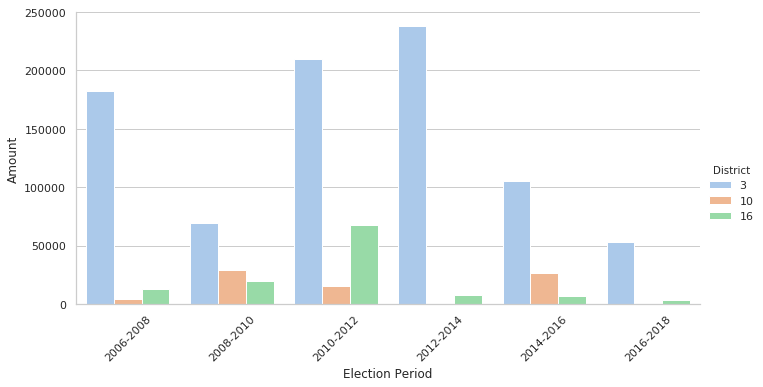


---

CANDIDATES PER ELECTION CYCLE
District 3
Election Period  Party     Candidate Name
2006-2008        Democrat  Green, Josh       182000.00
2008-2010        Democrat  Green, Josh        69150.00
2010-2012        Democrat  Green, Josh       205825.00
                           Kanuha, Dru         3920.00
2012-2014        Democrat  Green, Josh       230532.52
                           Kanuha, Dru         7247.08
2014-2016        Democrat  Green, Josh        94900.00
                           Kanuha, Dru        10500.00
2016-2018        Democrat  Ford, Brenda       10011.58
                           Kanuha, Dru        43060.00
Name: Amount, dtype: float64

---

District 10
Election Period  Party        Candidate Name  
2006-2008        Democrat     Ihara, Les           4655.00
2008-2010        Democrat     Ihara, Les          29434.00
2010-2012        Democrat     Ihara, Les          15735.00
2012-2014        Democrat     Ihara, Les            250.00
2014-2016        Democrat     F

In [0]:
# Low Senate Districts
# subset: all_state_senate_contribs

# Districts 3, 10, 16

sl_all = df2.loc[(df2['Office']=='Senate')&((df2['District']=='3')|(df2['District']=='10')|(df2['District']=='16'))]

# Generate bar plots of money per election period

print("District 3: Kona, Ka‘u (Hawaii Island)")
print("District 10: Kaimuki, Kapahulu, Palolo, Maunalani Heights, St. Louis Heights, Mo‘ili‘ili, Ala Wai")
print("District 16: Pearl City, Momilani, Pearlridge, ‘Aiea, Royal Summit, ‘Aiea Heights, Newtown, Waimalu, Halawa, Pearl Harbor")
  
slplot = sns.catplot(data=sl_all,
                   x='Election Period',
                   y='Amount',
                   hue='District',
                   hue_order=['3','10','16'],
                   kind='bar',
                   ci=None,
                   estimator=sum,
                   aspect=2,
                   order=['2006-2008','2008-2010','2010-2012','2012-2014','2014-2016','2016-2018'])
slplot.set_xticklabels(rotation=45)
plt.show()

print("\n---\n")

# ------------------------------------------------------------------------------

# look at candidates from these areas to get some insight

sl_d = ['3','10','16']

print('Candidates per Election Cycle'.upper())
for d in sl_d:
  print(f'District {d}')
  print(sl_all.loc[sl_all['District']==d].groupby(['Election Period','Party','Candidate Name'])['Amount']
        .sum())
  print("\n---\n")

# ------------------------------------------------------------------------------

# look at party breakdown

print("Party Breakdown".upper())
print(sl_all.groupby('Party').count()['Candidate Name']) #hmm
